# Quantification of intra-host genomic diversity of SARS-CoV-2 allows a high-resolution characterization of viral evolution and reveals functionally convergent variants

Daniele Ramazzotti, Fabrizio Angaroni, Davide Maspero, Carlo Gambacorti-Passerini, Marco Antoniotti, Alex Graudenzi*, Rocco Piazza*

* Corresponding authors: alex.graudenzi@unimib.it, rocco.piazza@unimib.it

Preprint at: https://www.biorxiv.org/content/10.1101/2020.04.22.044404v2

In [ ]:
# VERSO STEP #2 - Dataset #1

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# pip install scanpy[louvain]

# Loading the libraries

In [1]:
# Set working directory.

import os
os.getcwd()
os.chdir('/Users/alexgraudenzi/Desktop/SCANPY_COVID/') # Change to your base directory.
os.getcwd()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/alexgraudenzi/Desktop/SCANPY_COVID/'

In [9]:
# Initialization of session save/storing.

import dill
import pickle
import gc

gc.collect()

5

In [10]:
pickle.HIGHEST_PROTOCOL

4

In [11]:
# pip install leidenalg

In [12]:
# import libraries.

import scanpy as sc
import leidenalg
import scanpy.external as sce
import numpy as np
import scipy as sp
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axxx
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
# from gprofiler import GProfiler
import anndata as an
from pybiomart import Dataset

In [13]:
plt.rcParams['figure.figsize'] = (8,8) # Rescale figures.
sc.settings.verbosity = 3
sc.set_figure_params(dpi = 400, dpi_save = 500)
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.8.2 louvain==0.6.1


In [14]:
import matplotlib.cm as cm

def colormap(fig, nax):
    ax1  = fig.get_axes()[nax]
    clim = ax1.get_children()[0].get_clim()
    cnorm = colors.Normalize(clim[0], clim[1])
    fig.colorbar(cm.ScalarMappable(norm = cnorm, cmap = None), ax = ax1)
    fig.delaxes(fig.get_axes()[-2])

## Input data



In [15]:
filename1 = "VF_matrix.txt"
filename4 = "assignments.csv"
filename5 = "metadata.txt"

In [16]:
data_all = pd.read_csv(filename1, header = 0, sep = ',')
assignments = pd.read_csv(filename4, header = 0, sep = ',')
metadata = pd.read_csv(filename5, header = 0, sep = '\t')

In [17]:
data_all.set_index("Unnamed: 0", drop = True, inplace = True)
assignments.set_index("Unnamed: 0", drop = True, inplace = True)
metadata.set_index("Unnamed: 0", drop = True, inplace = True)

In [18]:
adata_all = an.AnnData(data_all.T)

In [19]:
adata_all.var_names_make_unique()
adata_all.obs_names_make_unique()

print(adata_all)
print(assignments)

AnnData object with n_obs × n_vars = 162 × 9110 
            Cluster
Unnamed: 0         
SRR10903401     C03
SRR10903402     C03
SRR10971381     C03
SRR11092059     C03
SRR11092062     C03
...             ...
SRR11621928     C09
SRR11621929     C09
SRR11621930     C02
SRR11621931     C07
SRR11621932     C02

[162 rows x 1 columns]


In [20]:
adata_all.obs['Country'] = 'NA'
adata_all.obs['DateGISAID'] = 'NA'

In [21]:
adata_all.obs['Country'][:] = metadata['Country']
adata_all.obs['DateGISAID'][:] = metadata['Date']

In [22]:
adata_all.obs['Clade']= 'NA'
adata_all.obs['Clade'][:] = assignments['Cluster']

/Users/alexgraudenzi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
arr = [2, 3, 7, 9]

Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 41
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 41
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


... storing 'Country' as categorical
... storing 'Clade' as categorical


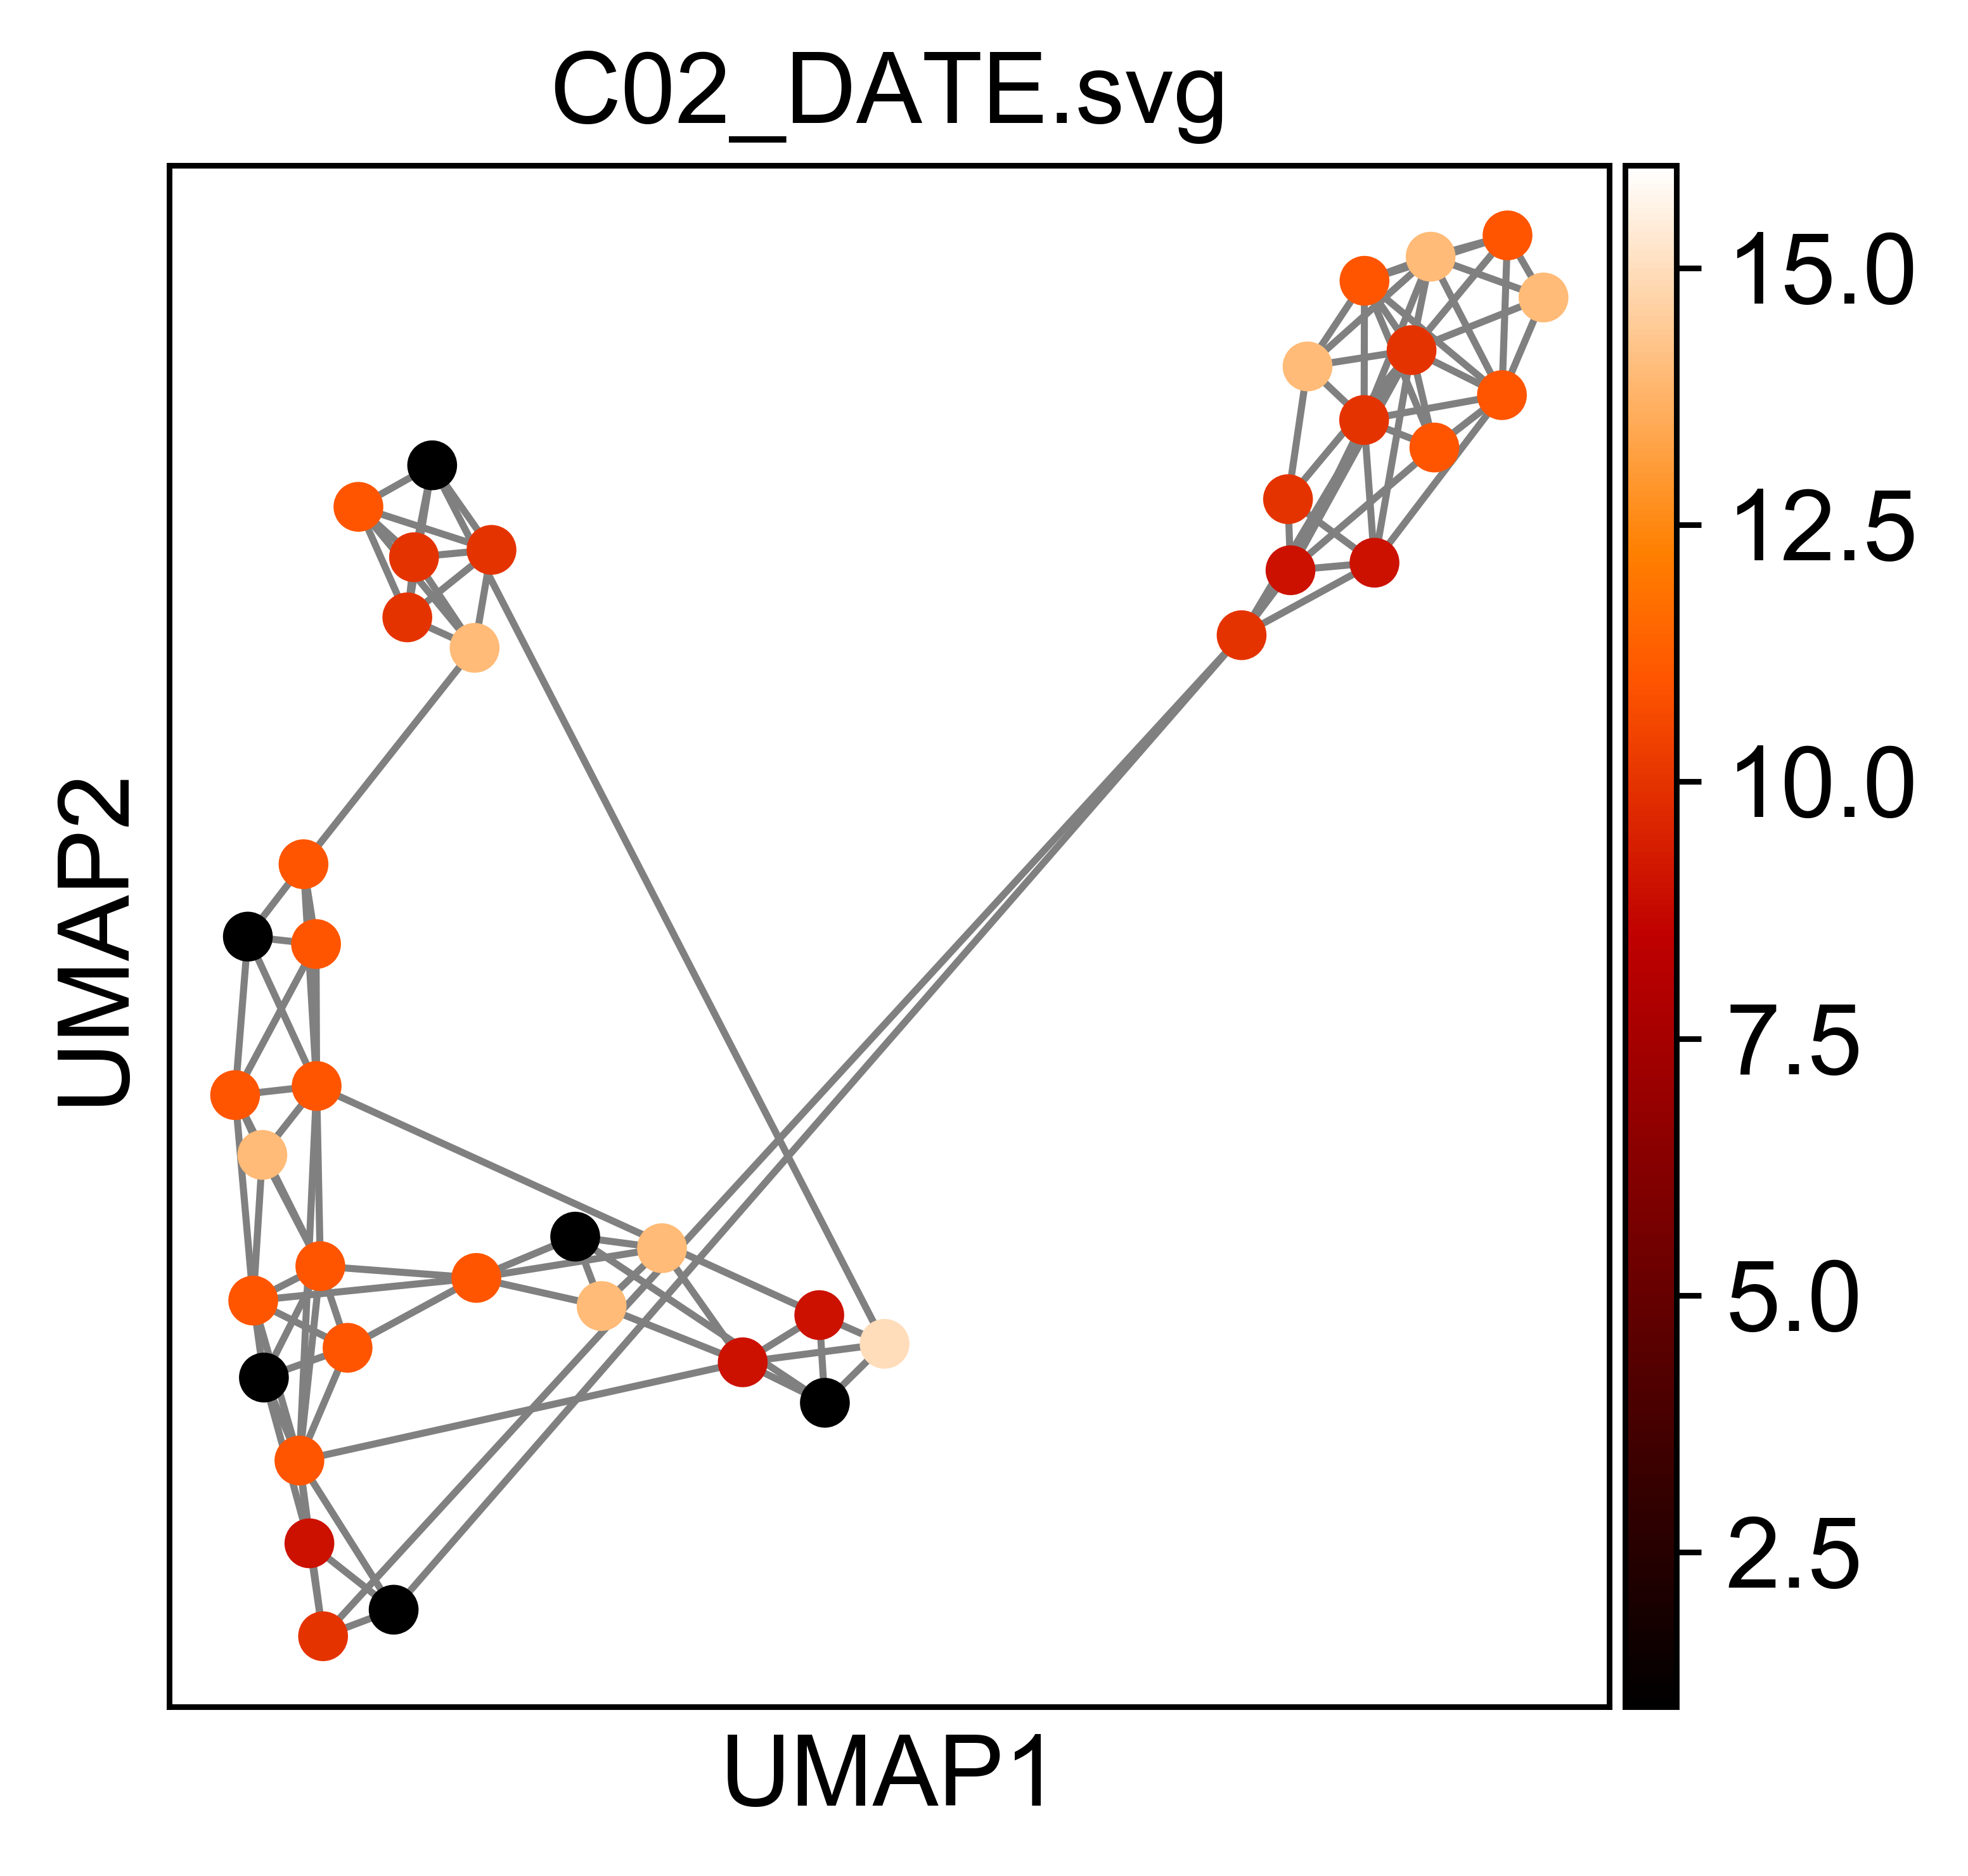

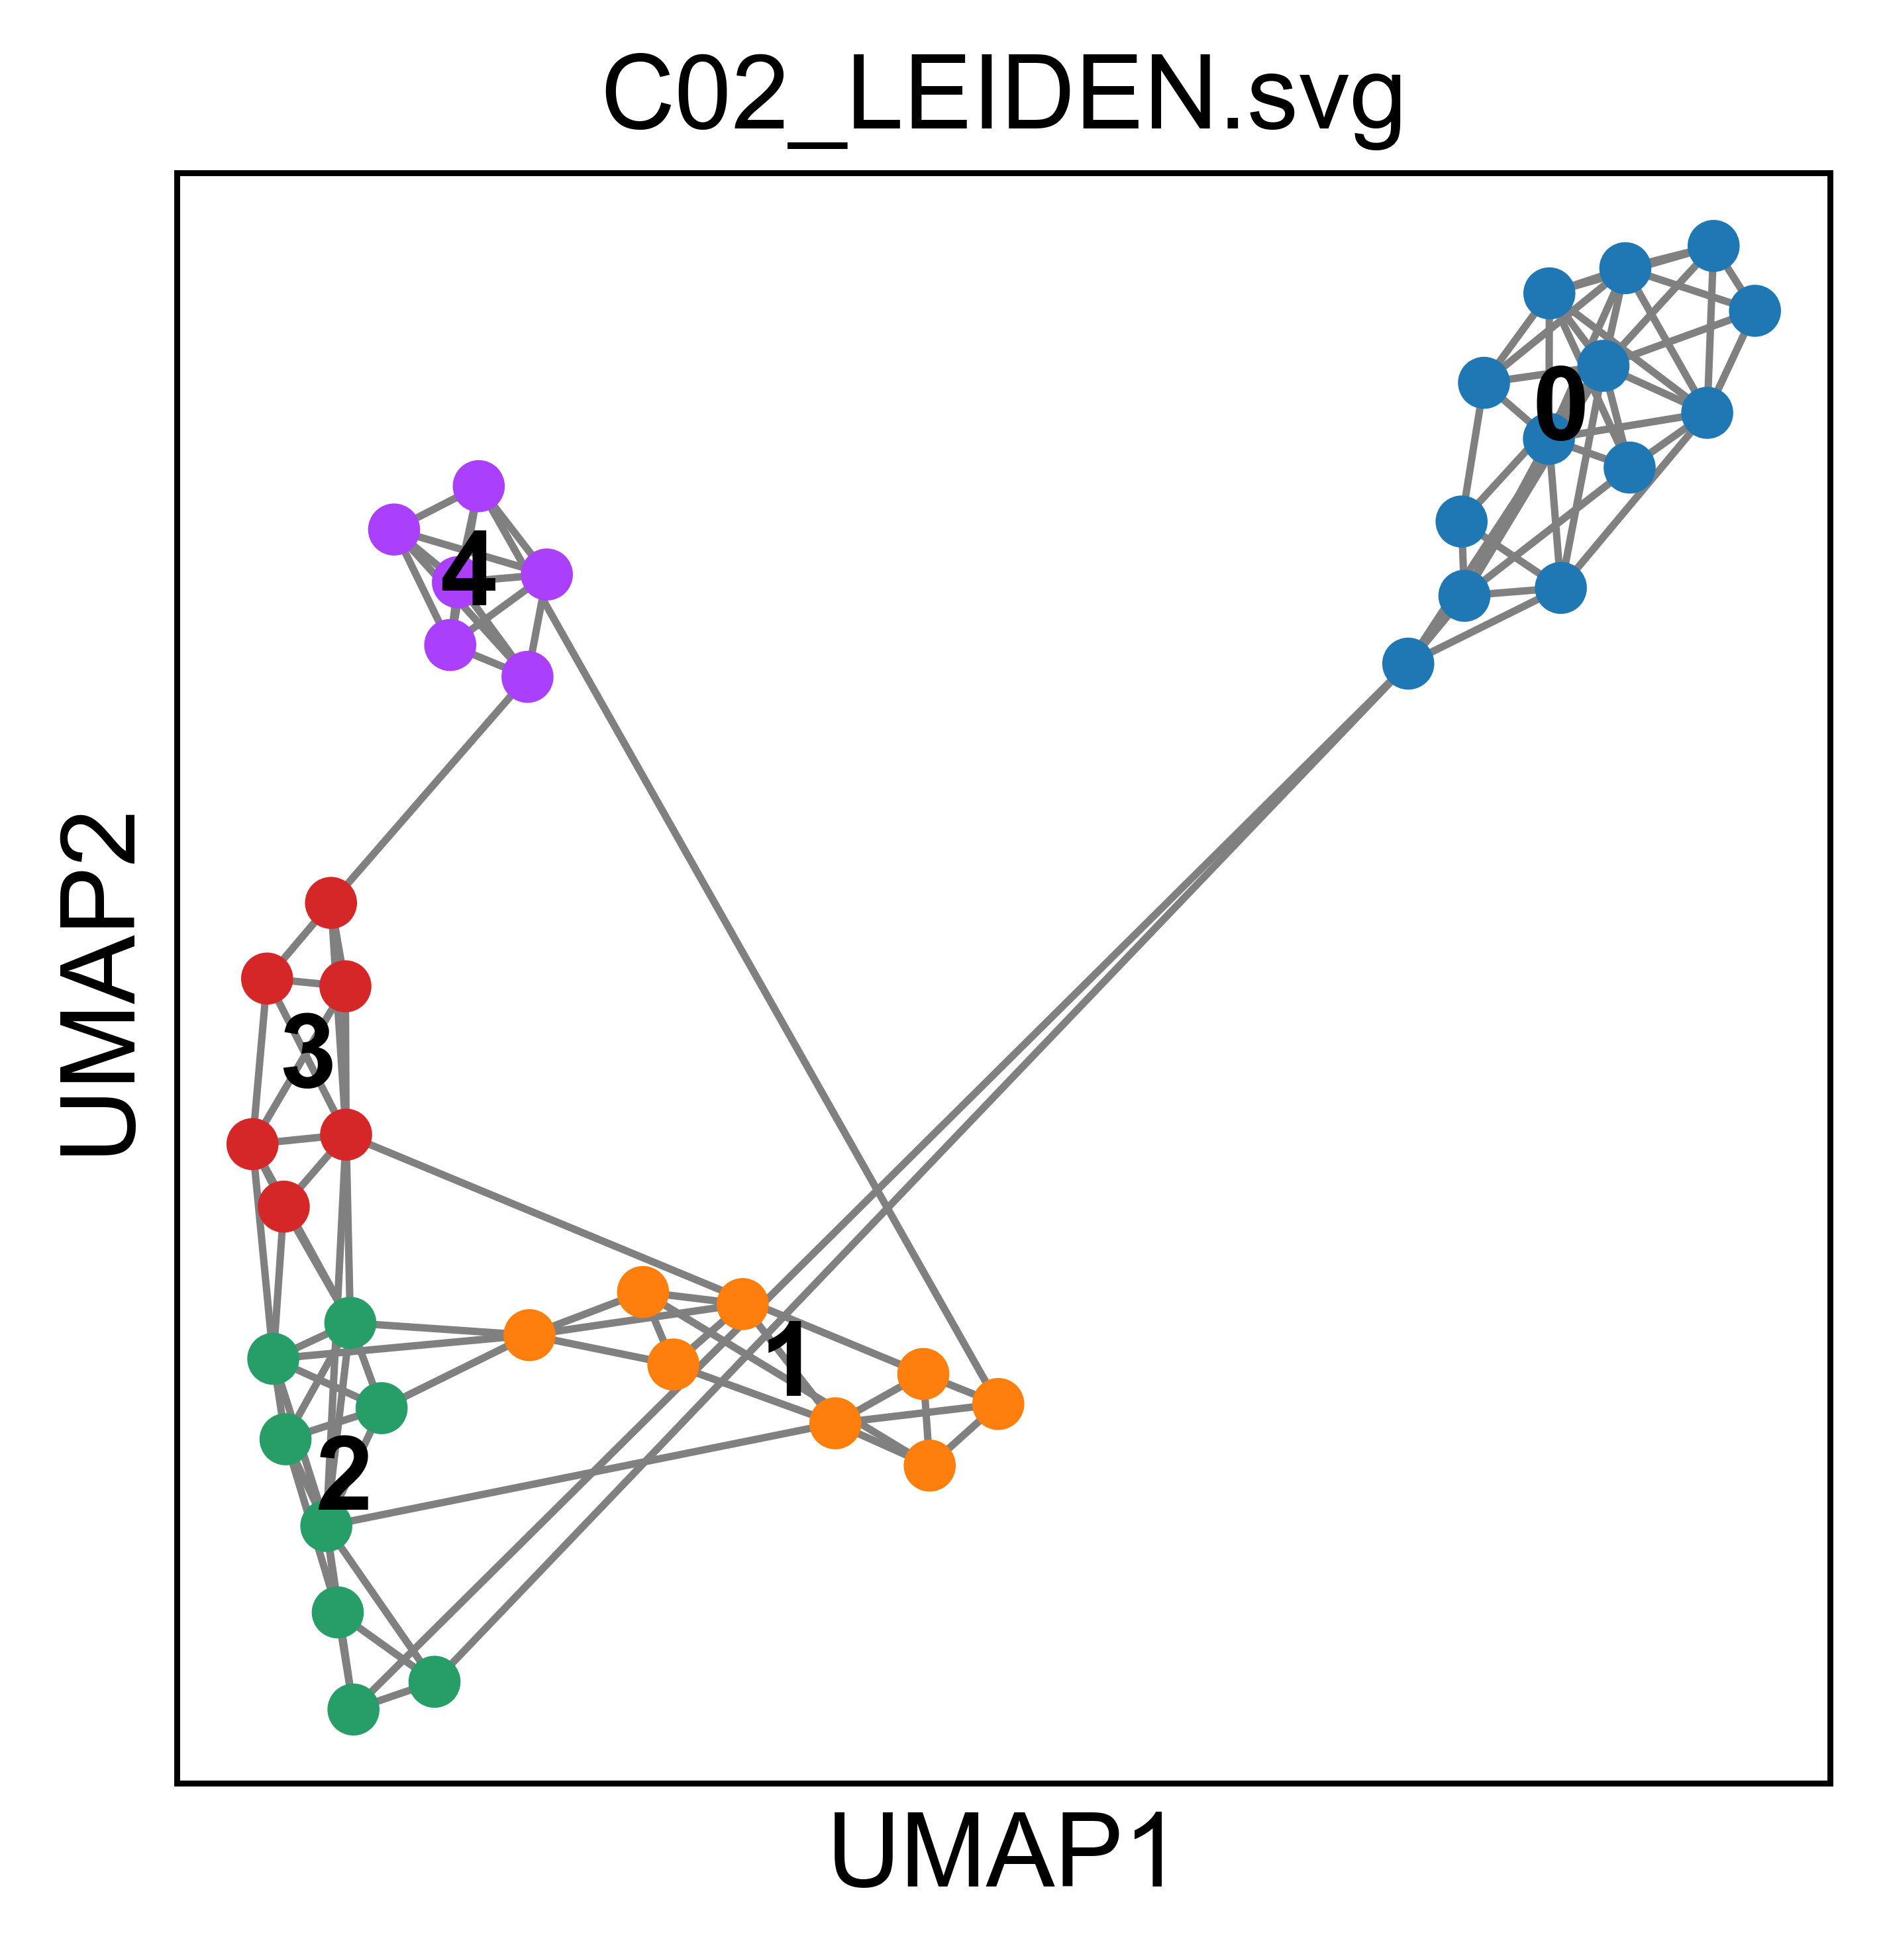

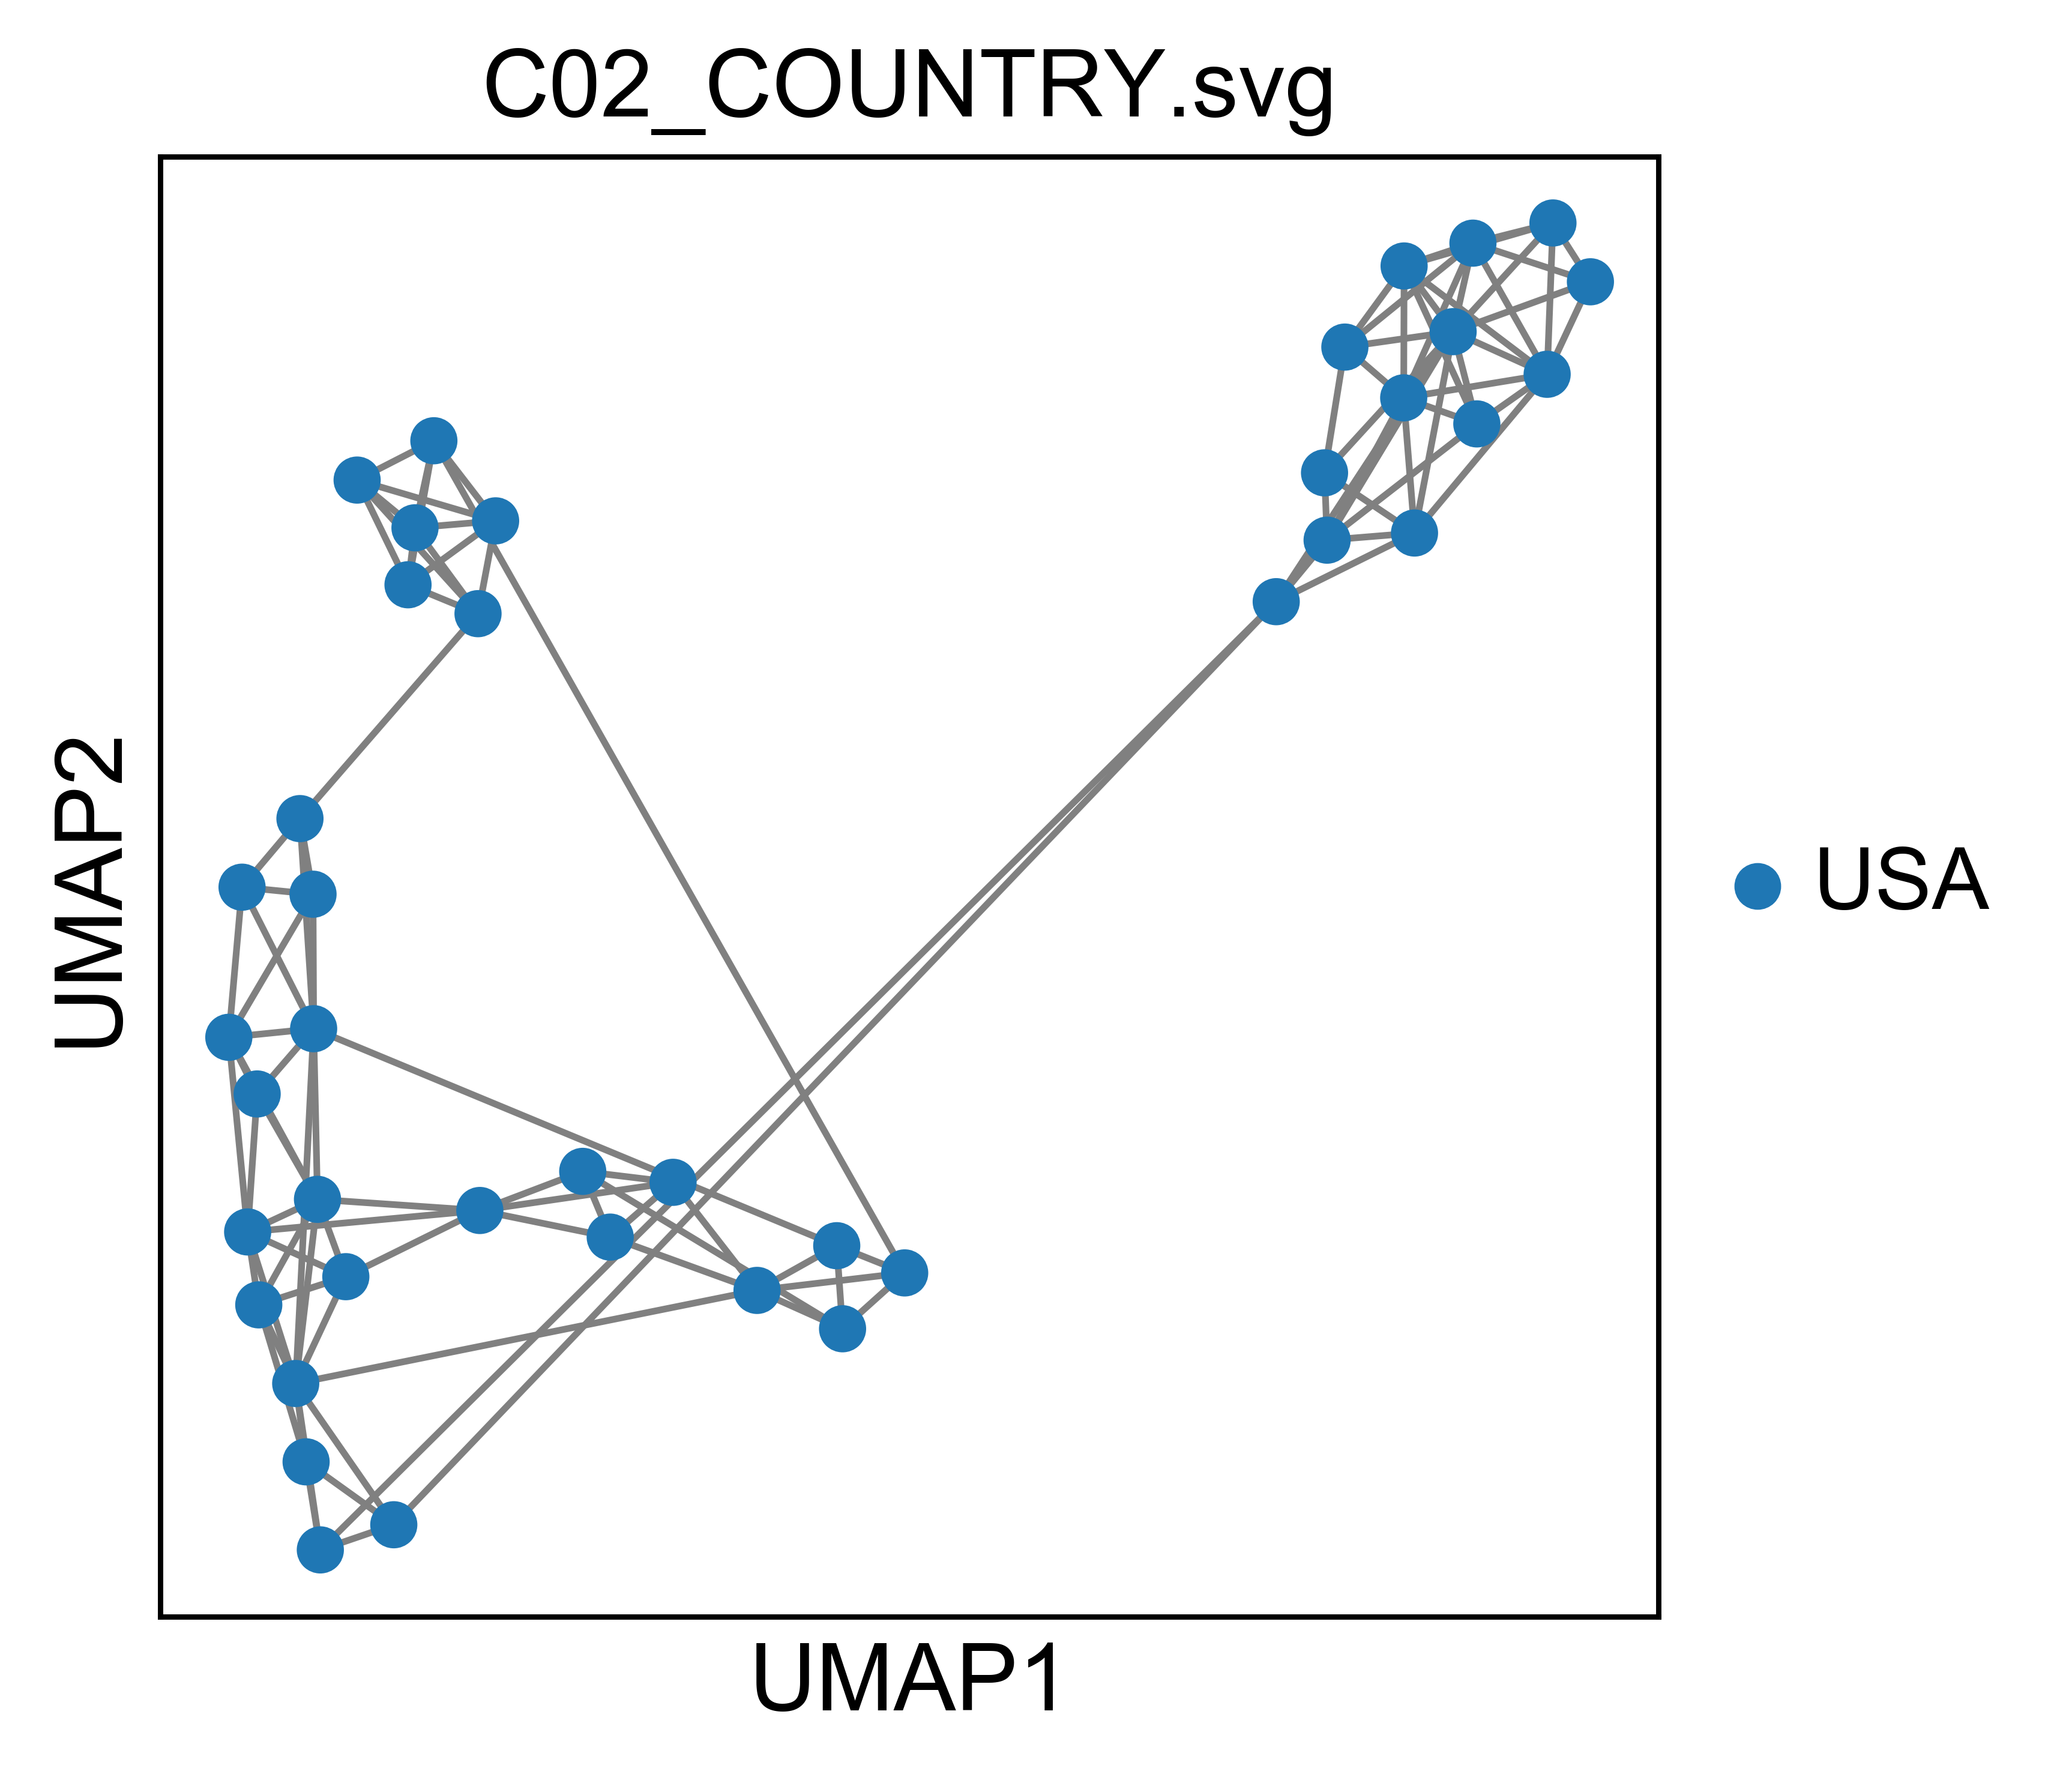

writing '.csv' files to C02


Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 13
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 13
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


... storing 'Country' as categorical
... storing 'Clade' as categorical


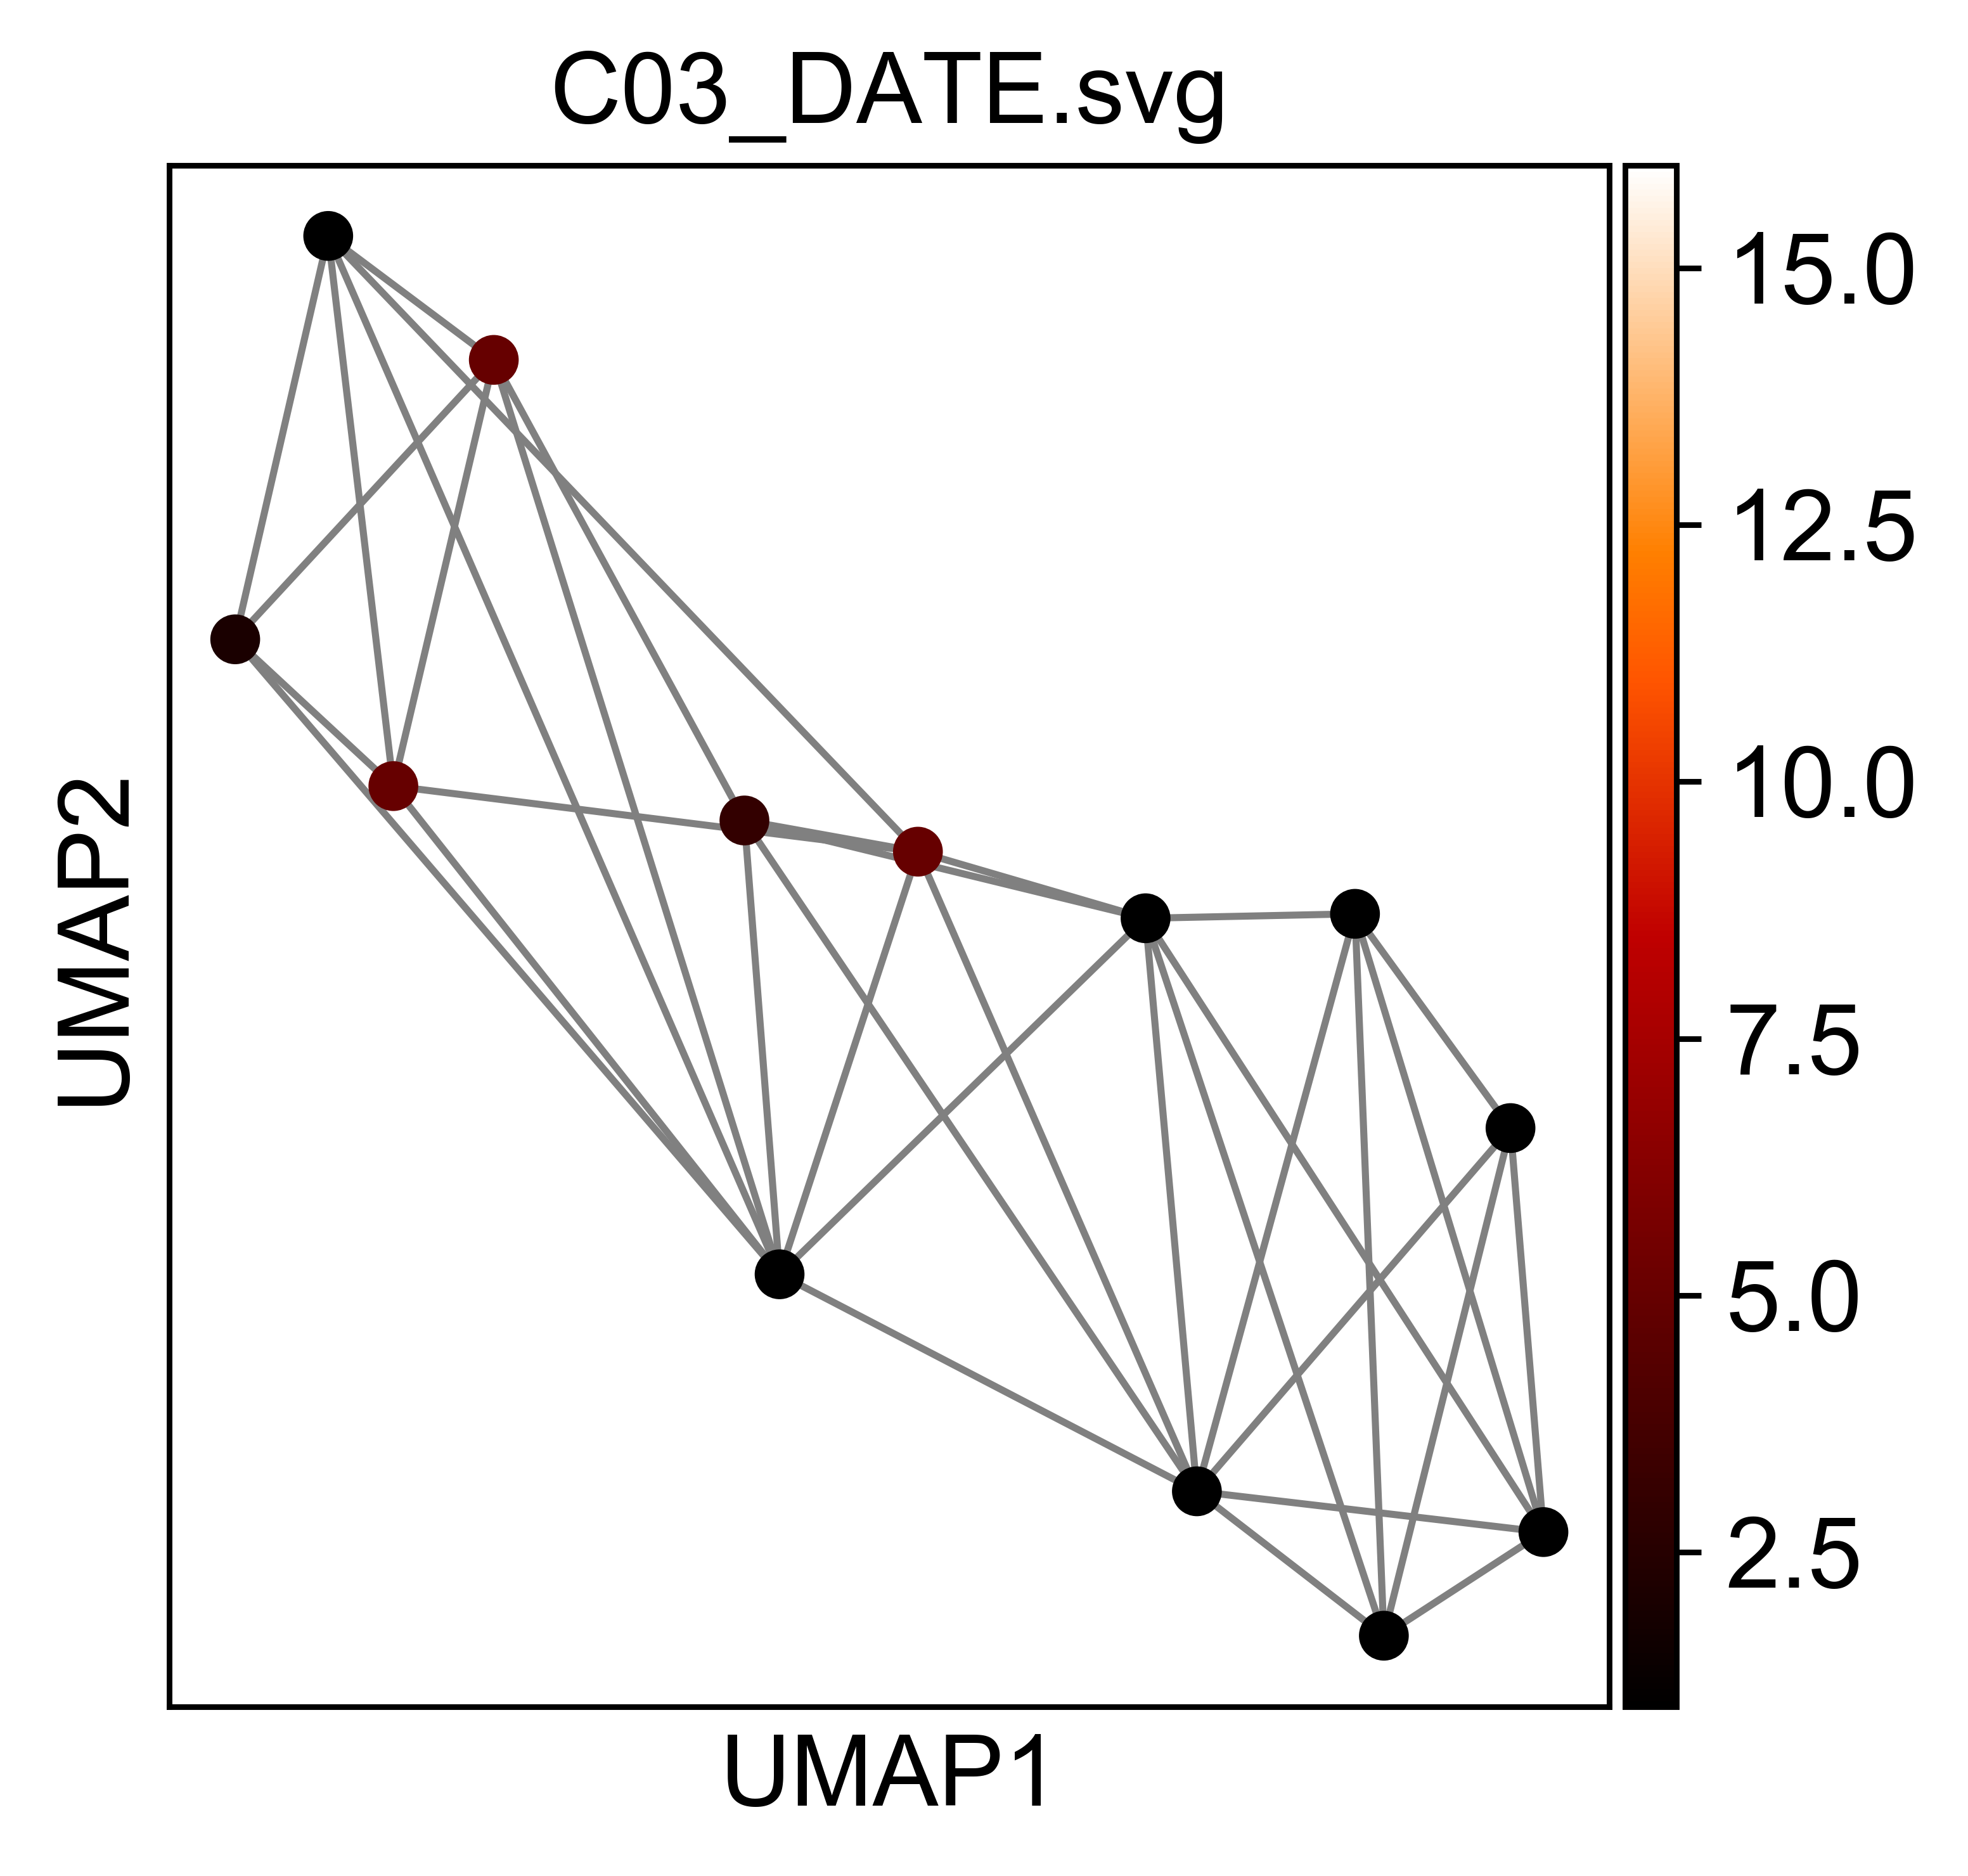

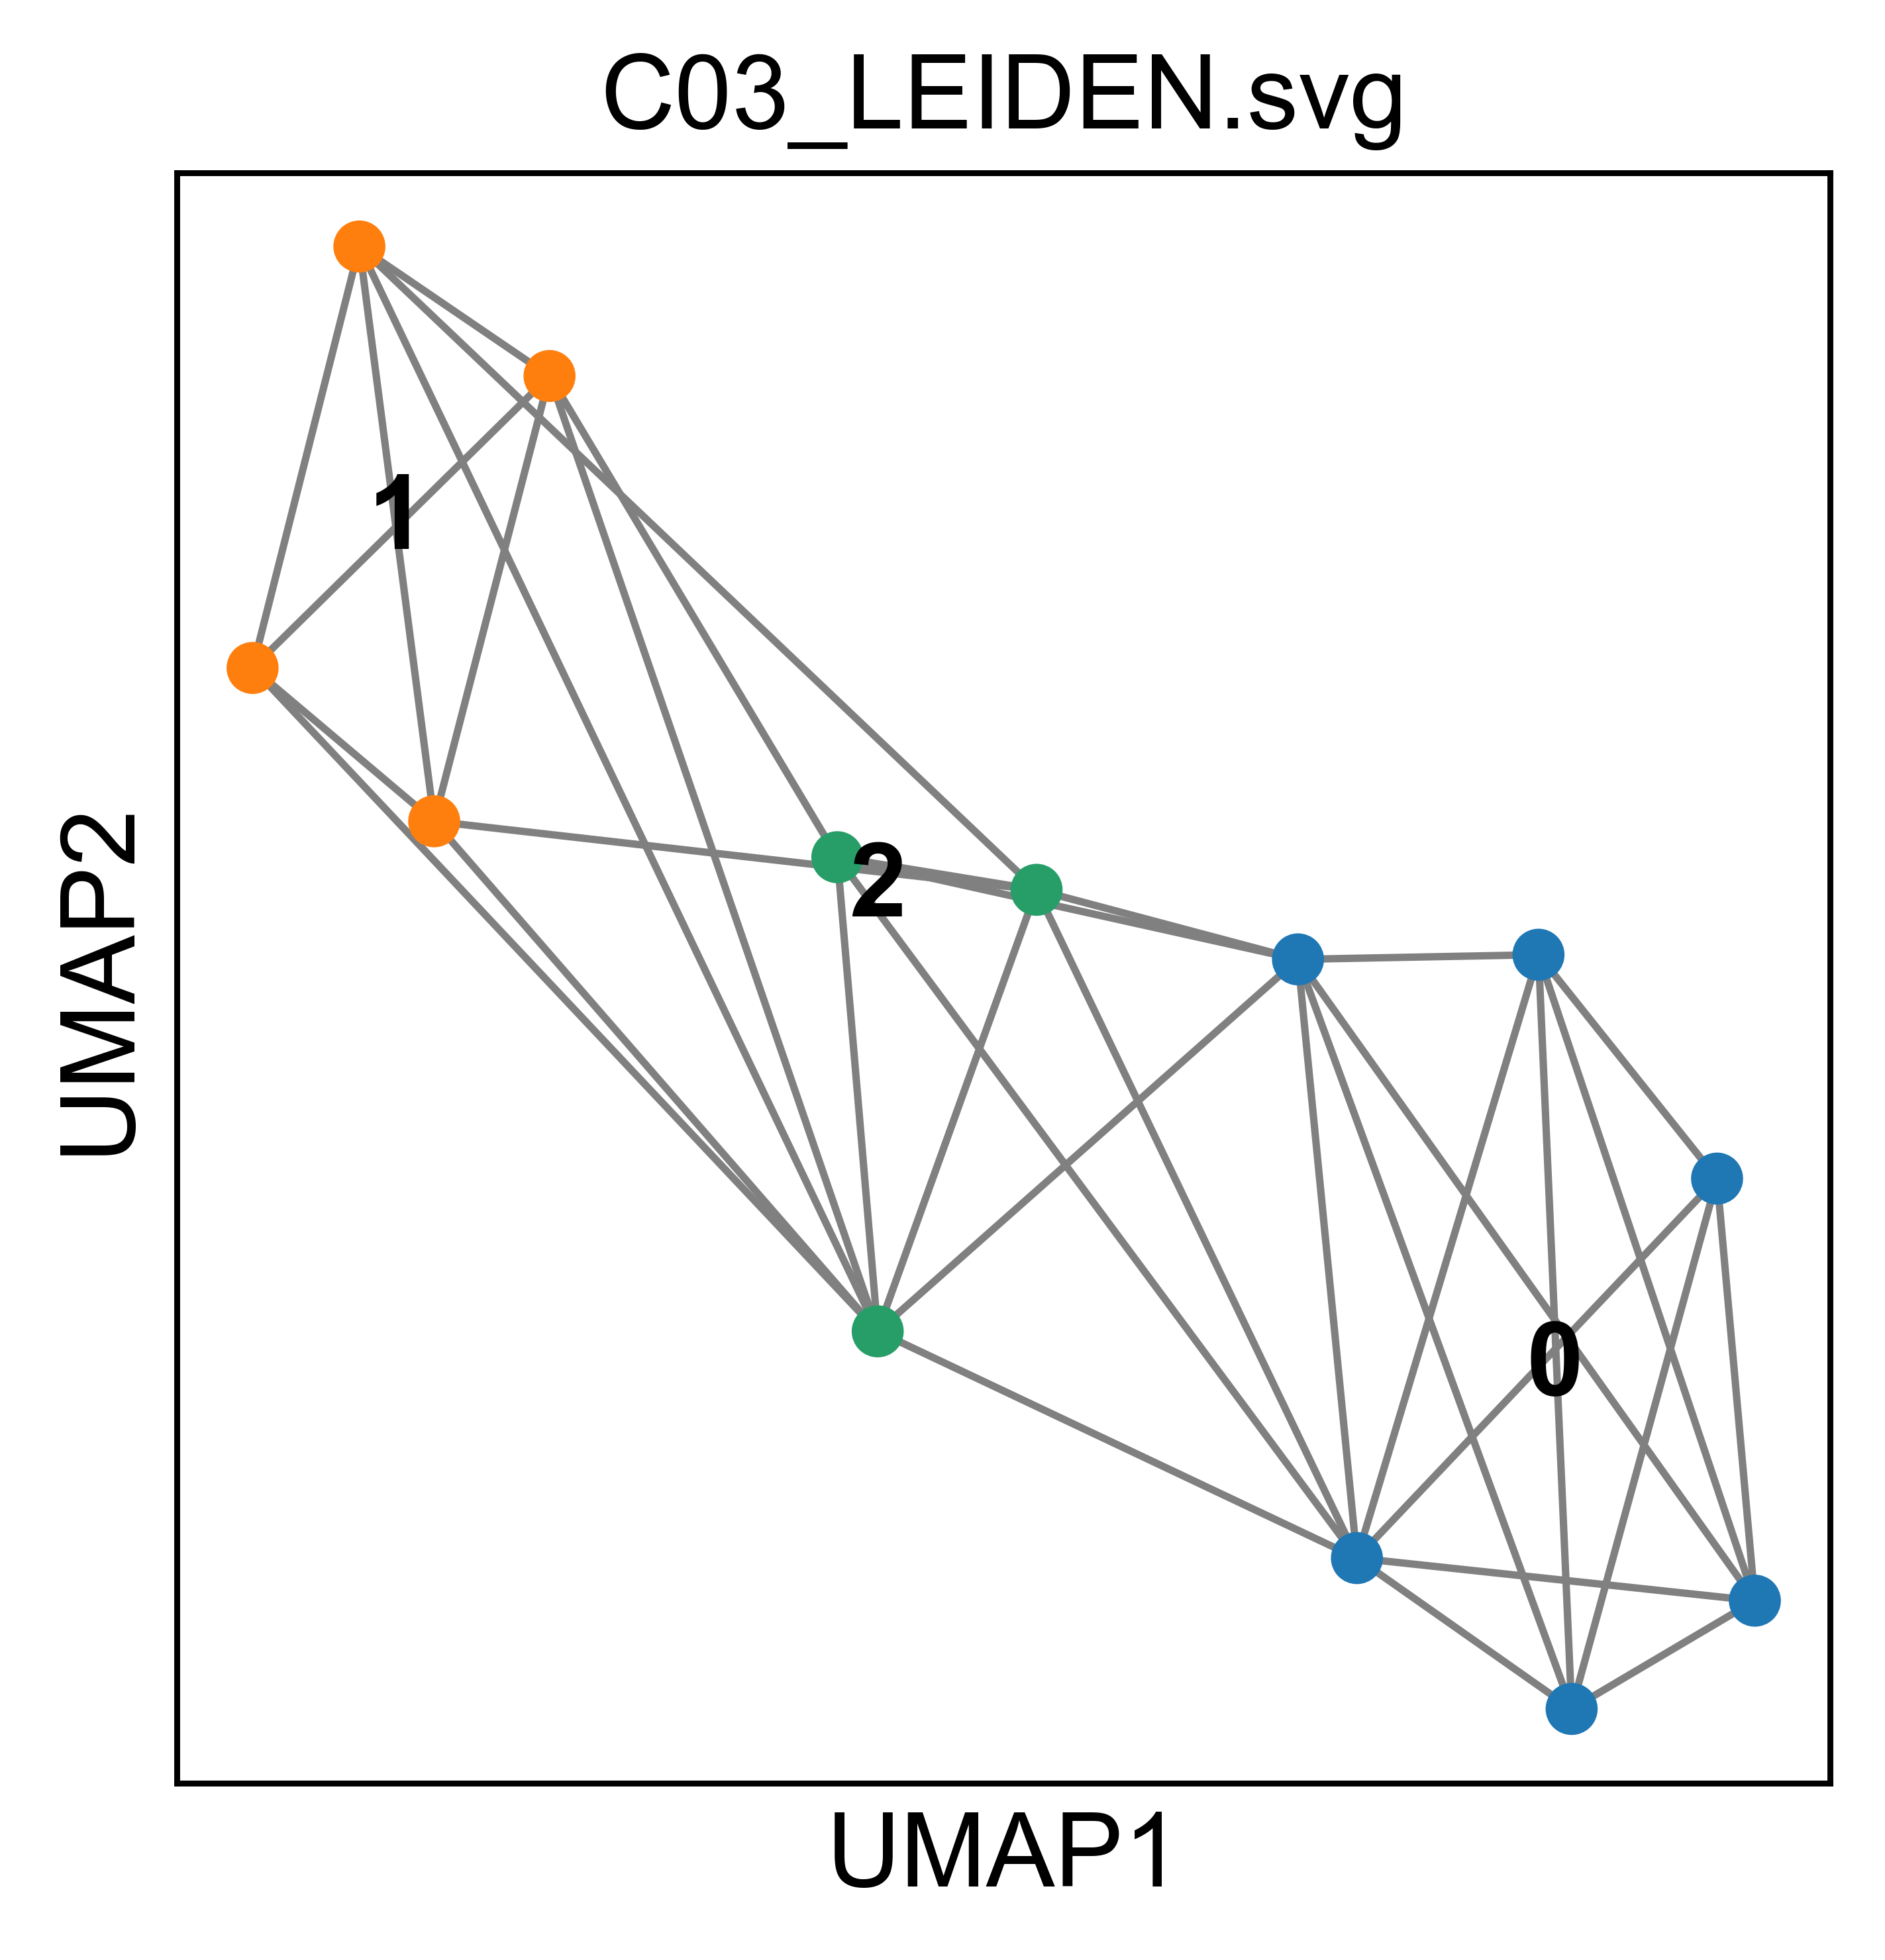

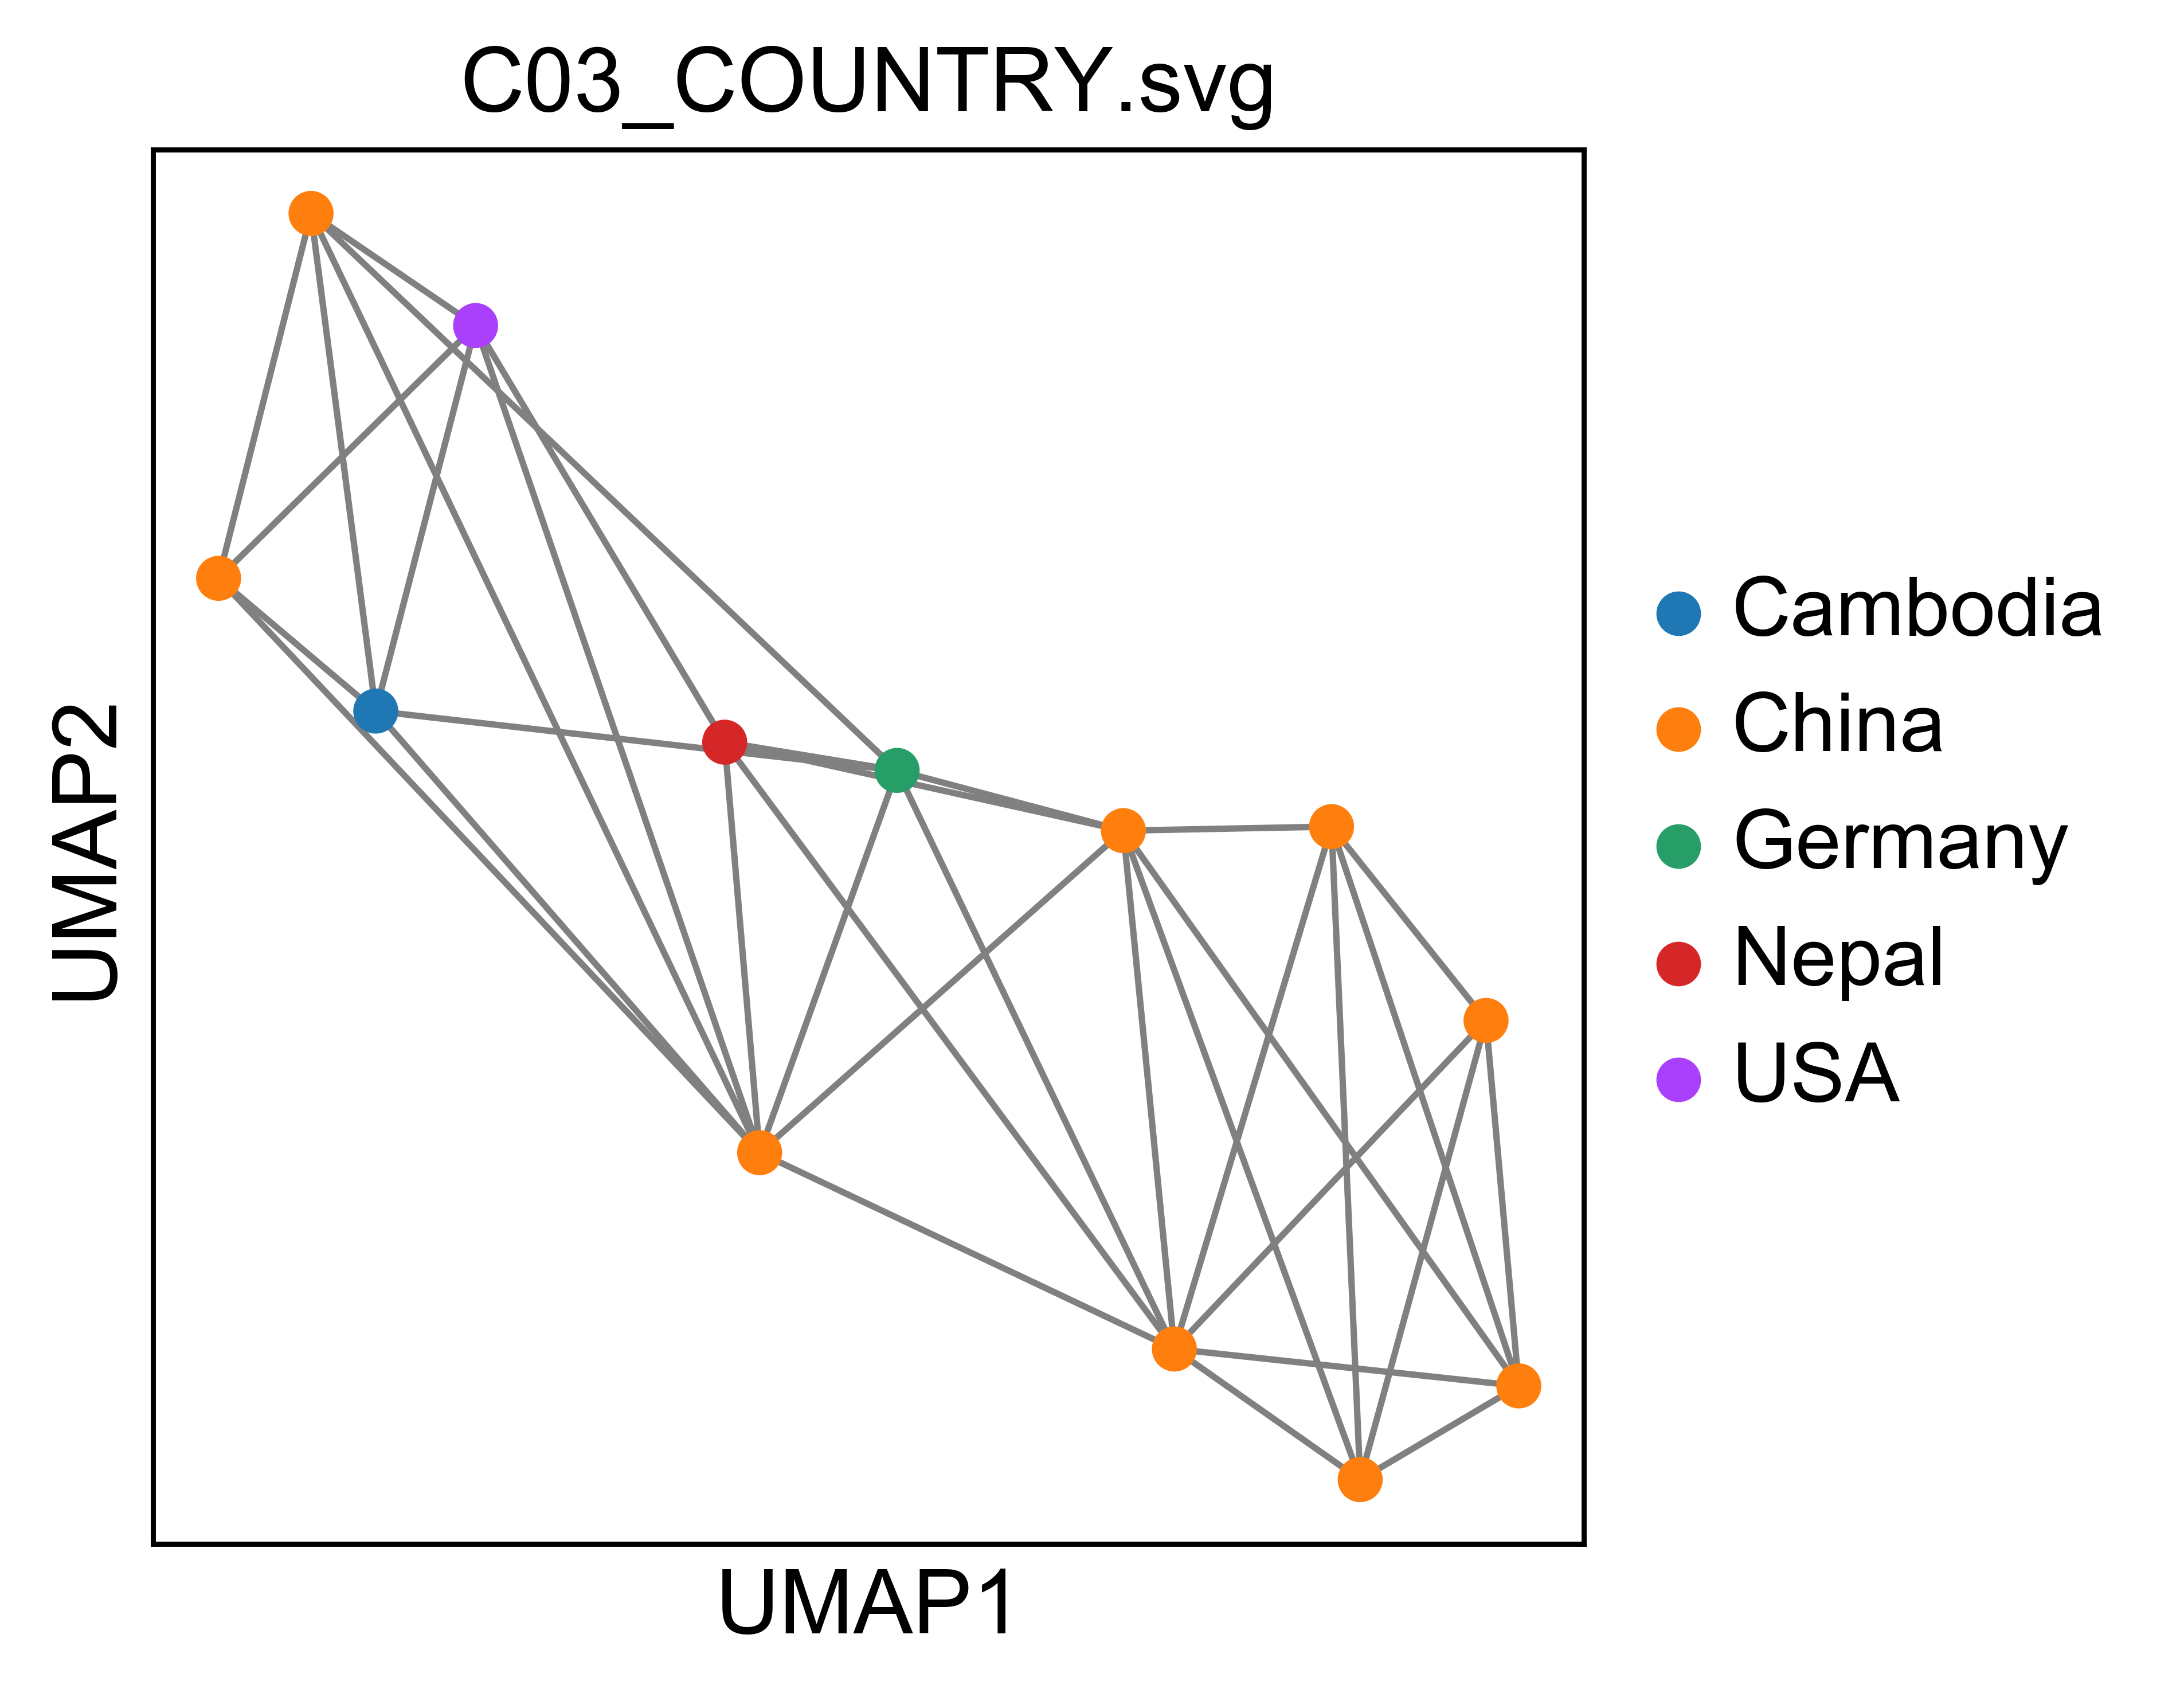

writing '.csv' files to C03


Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 36
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 36
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


... storing 'Country' as categorical
... storing 'Clade' as categorical


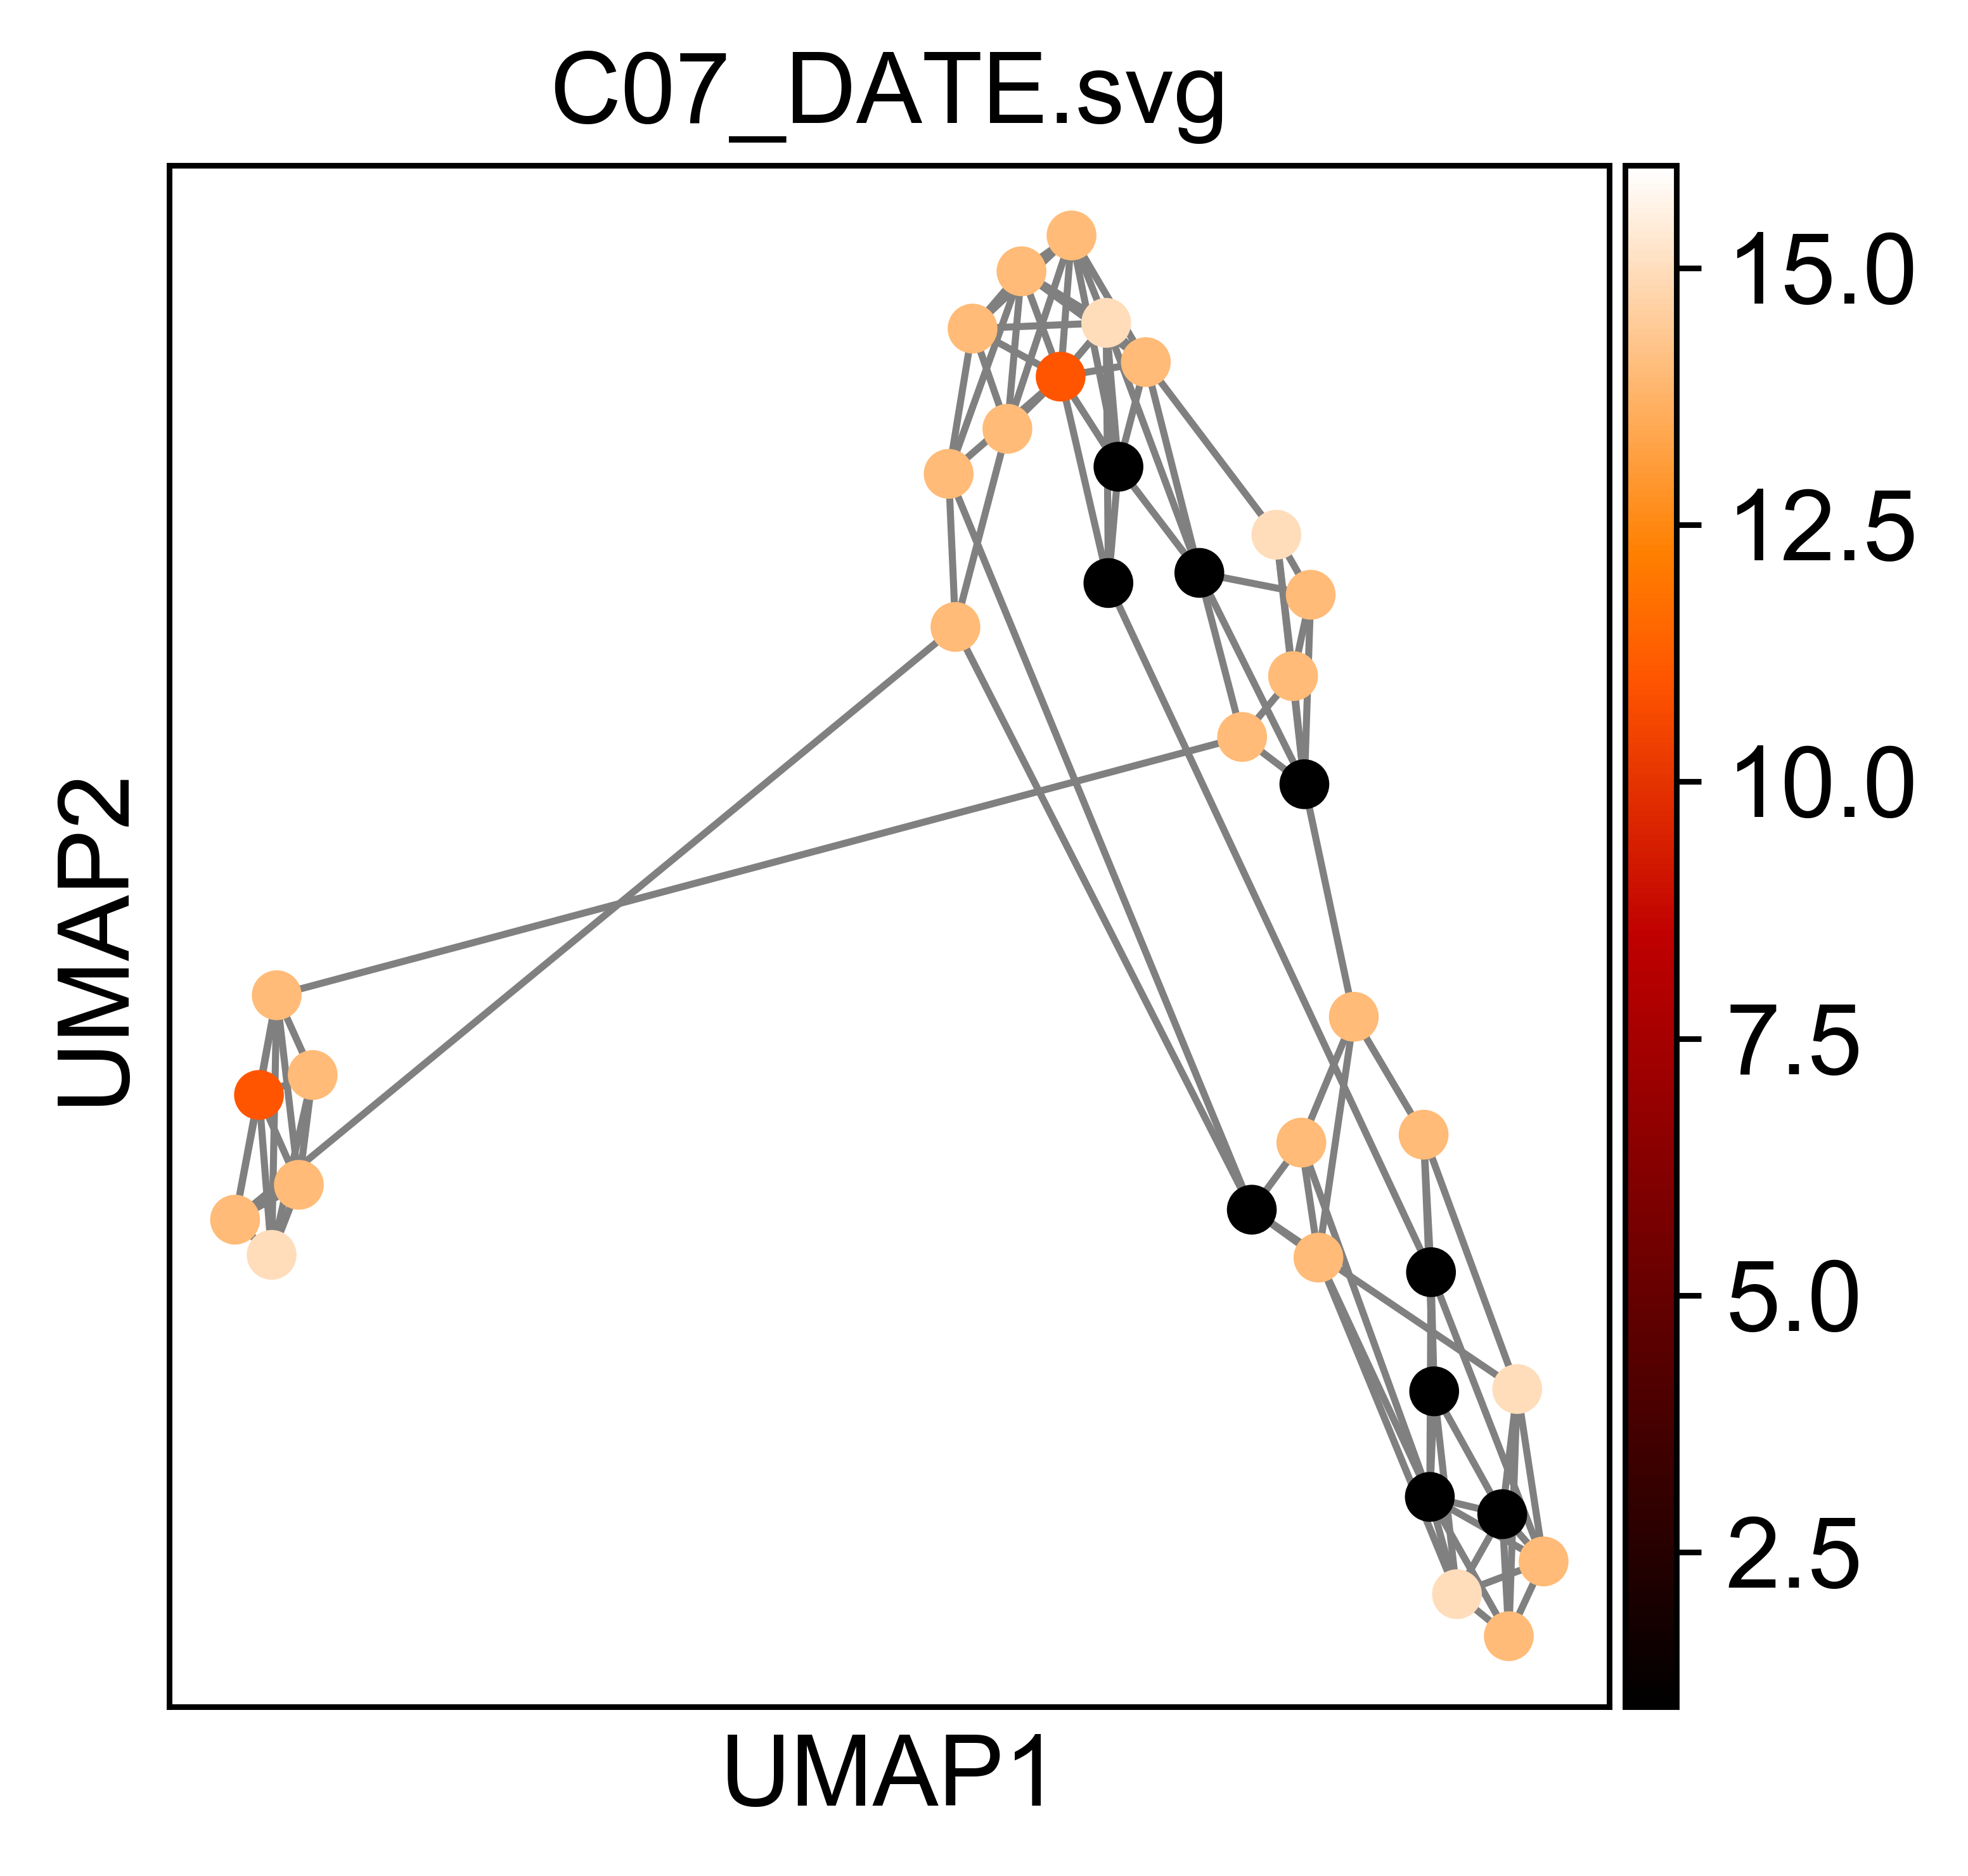

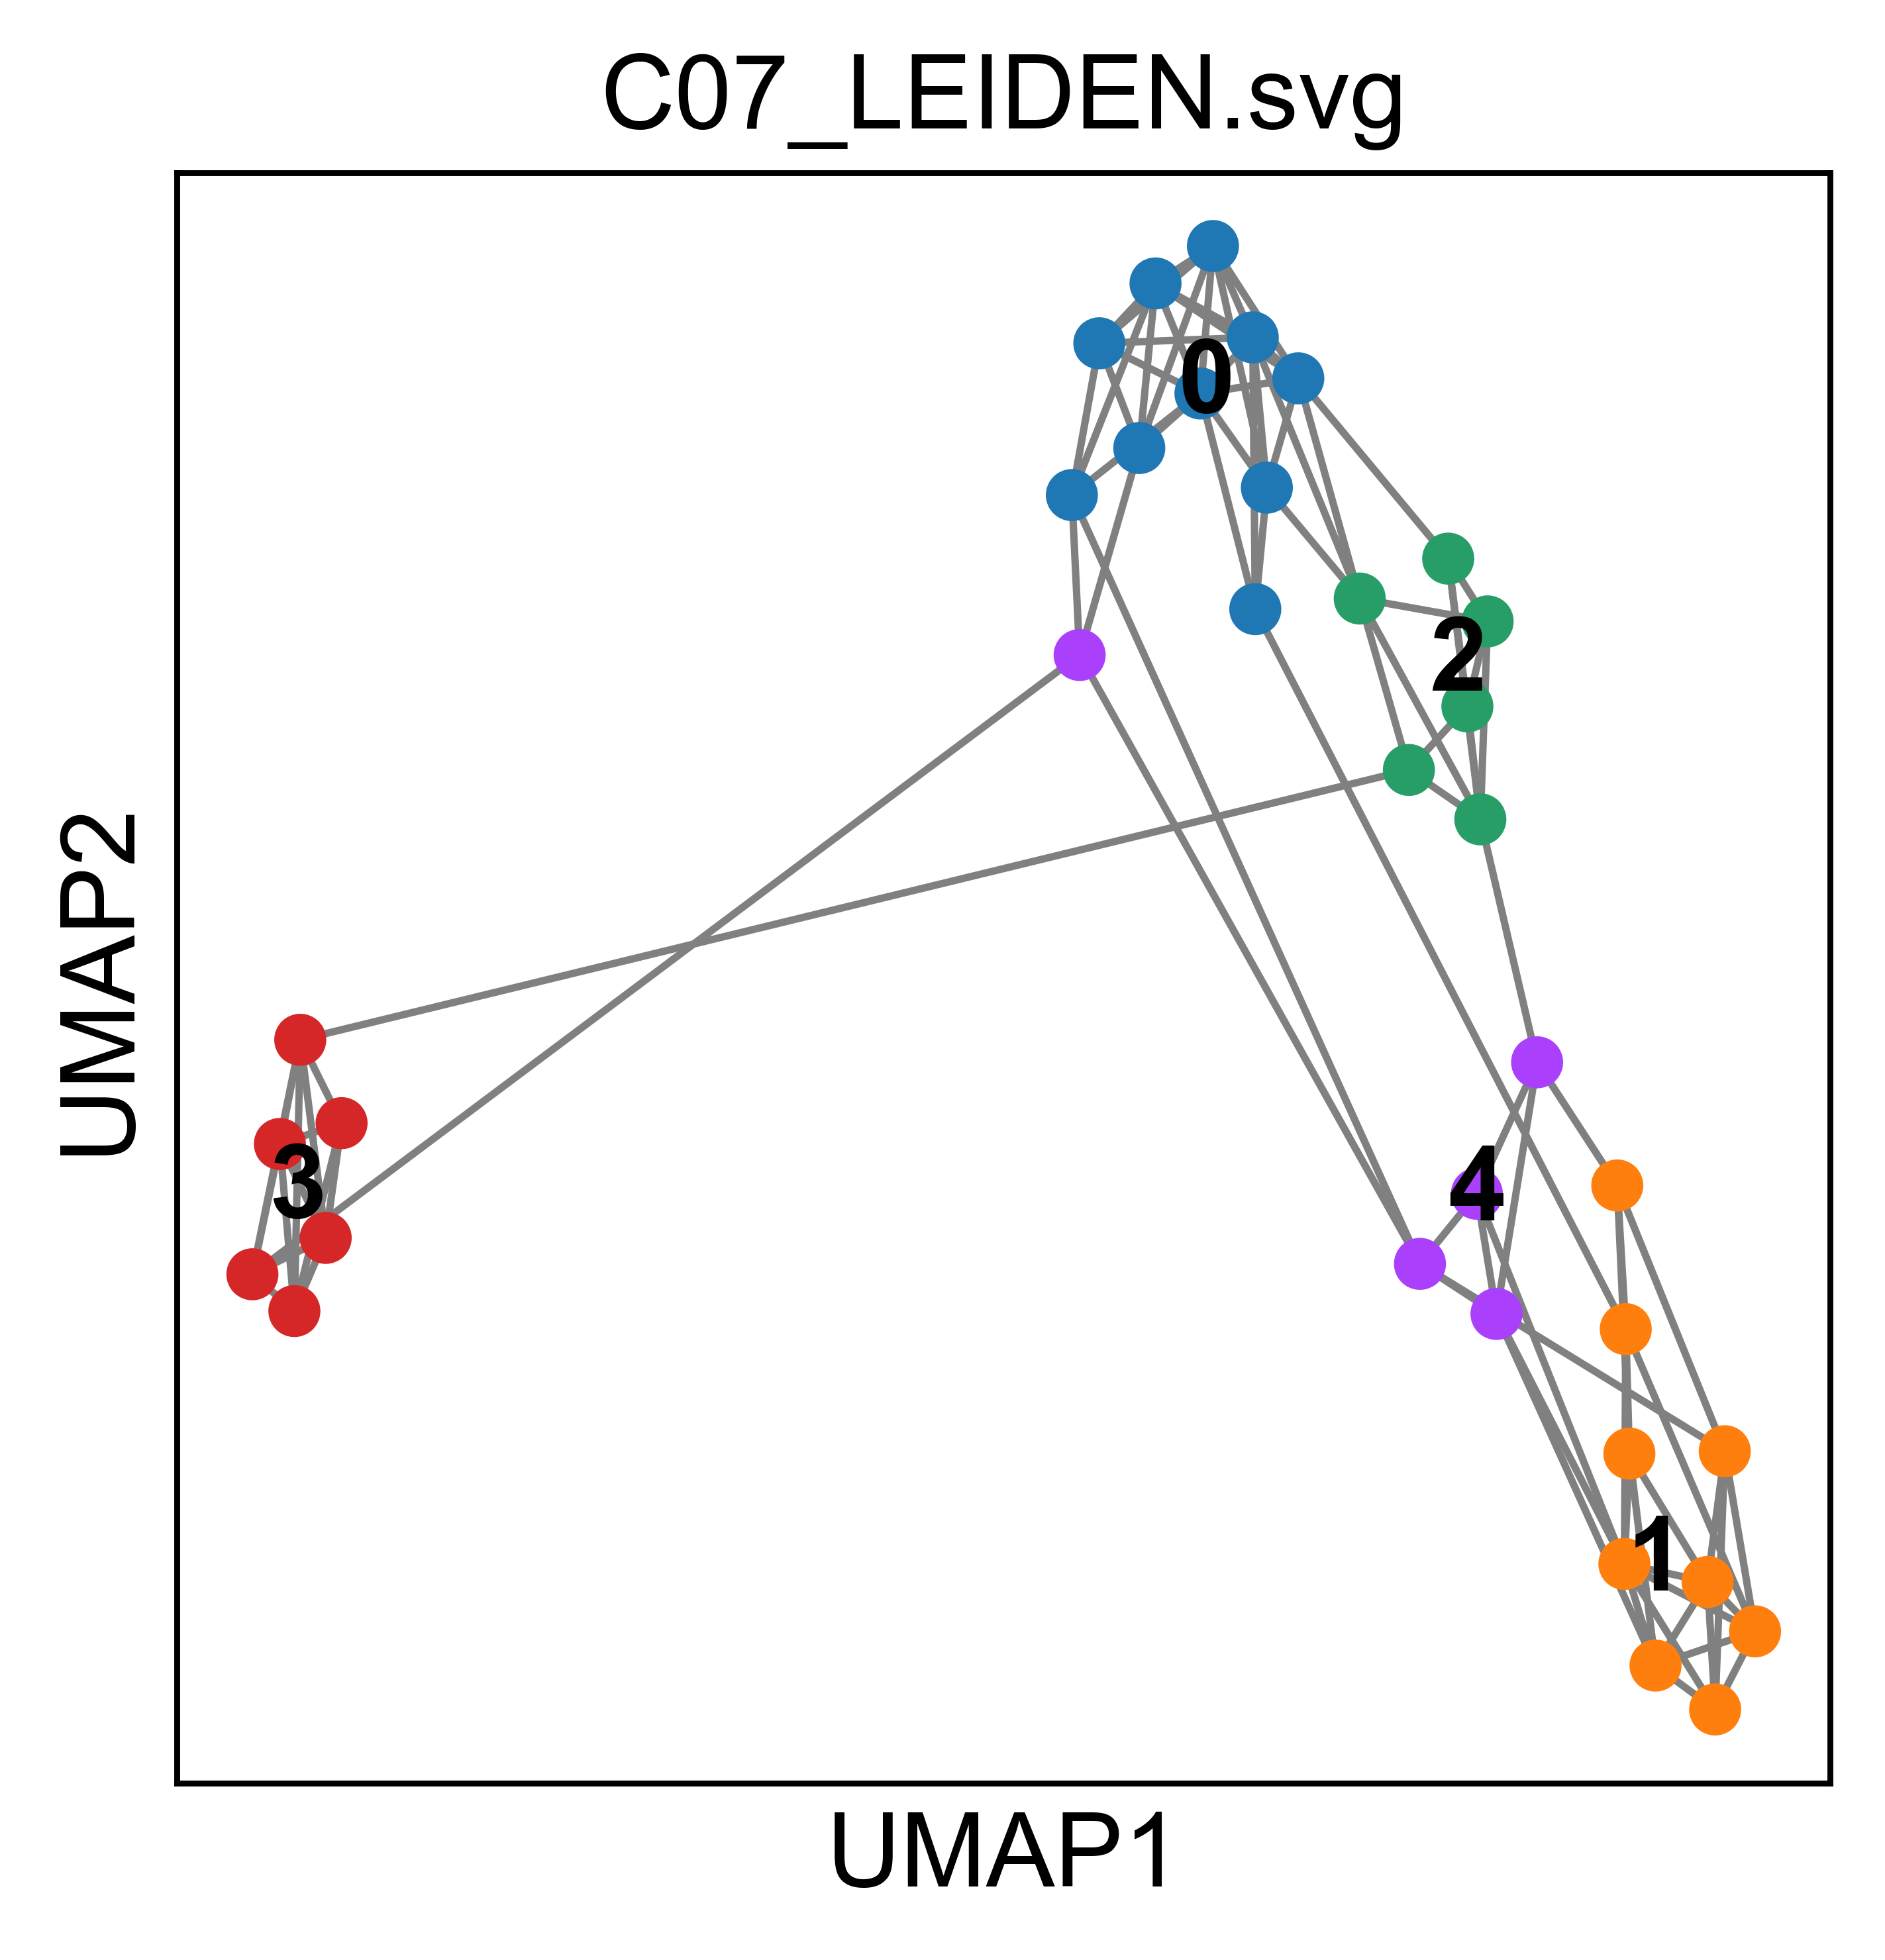

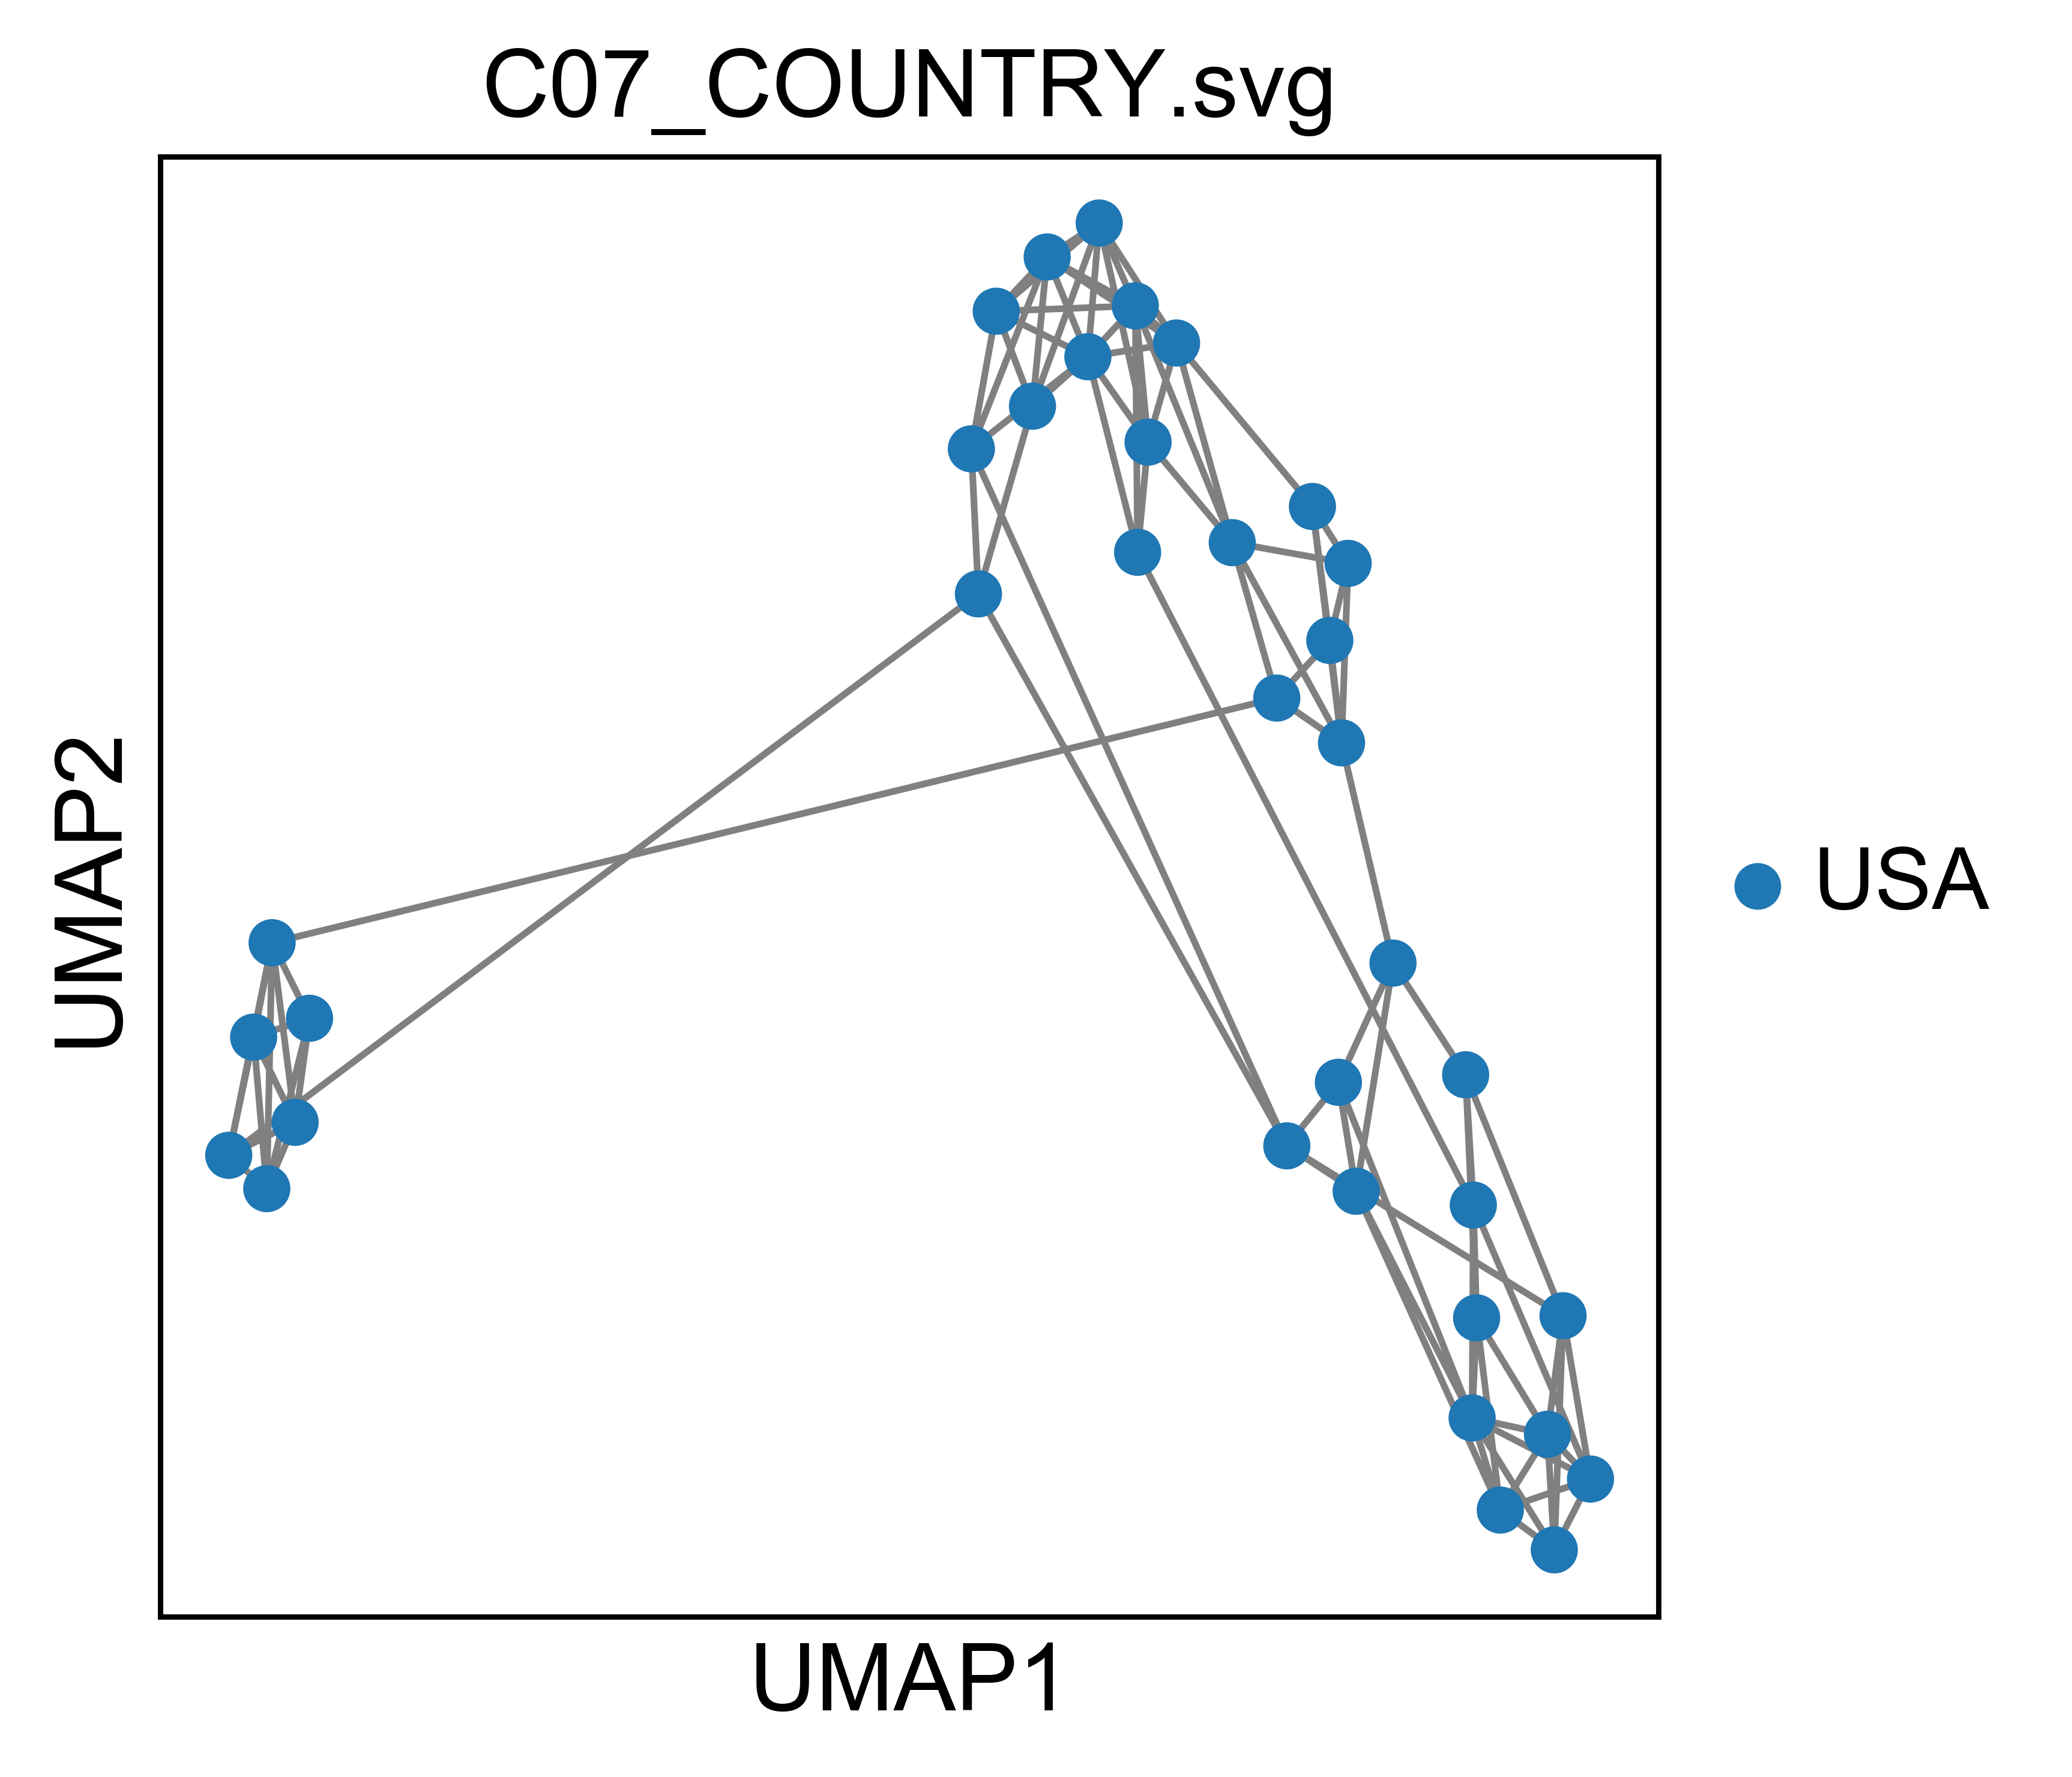

writing '.csv' files to C07


Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 33
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 33
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


... storing 'Country' as categorical
... storing 'Clade' as categorical


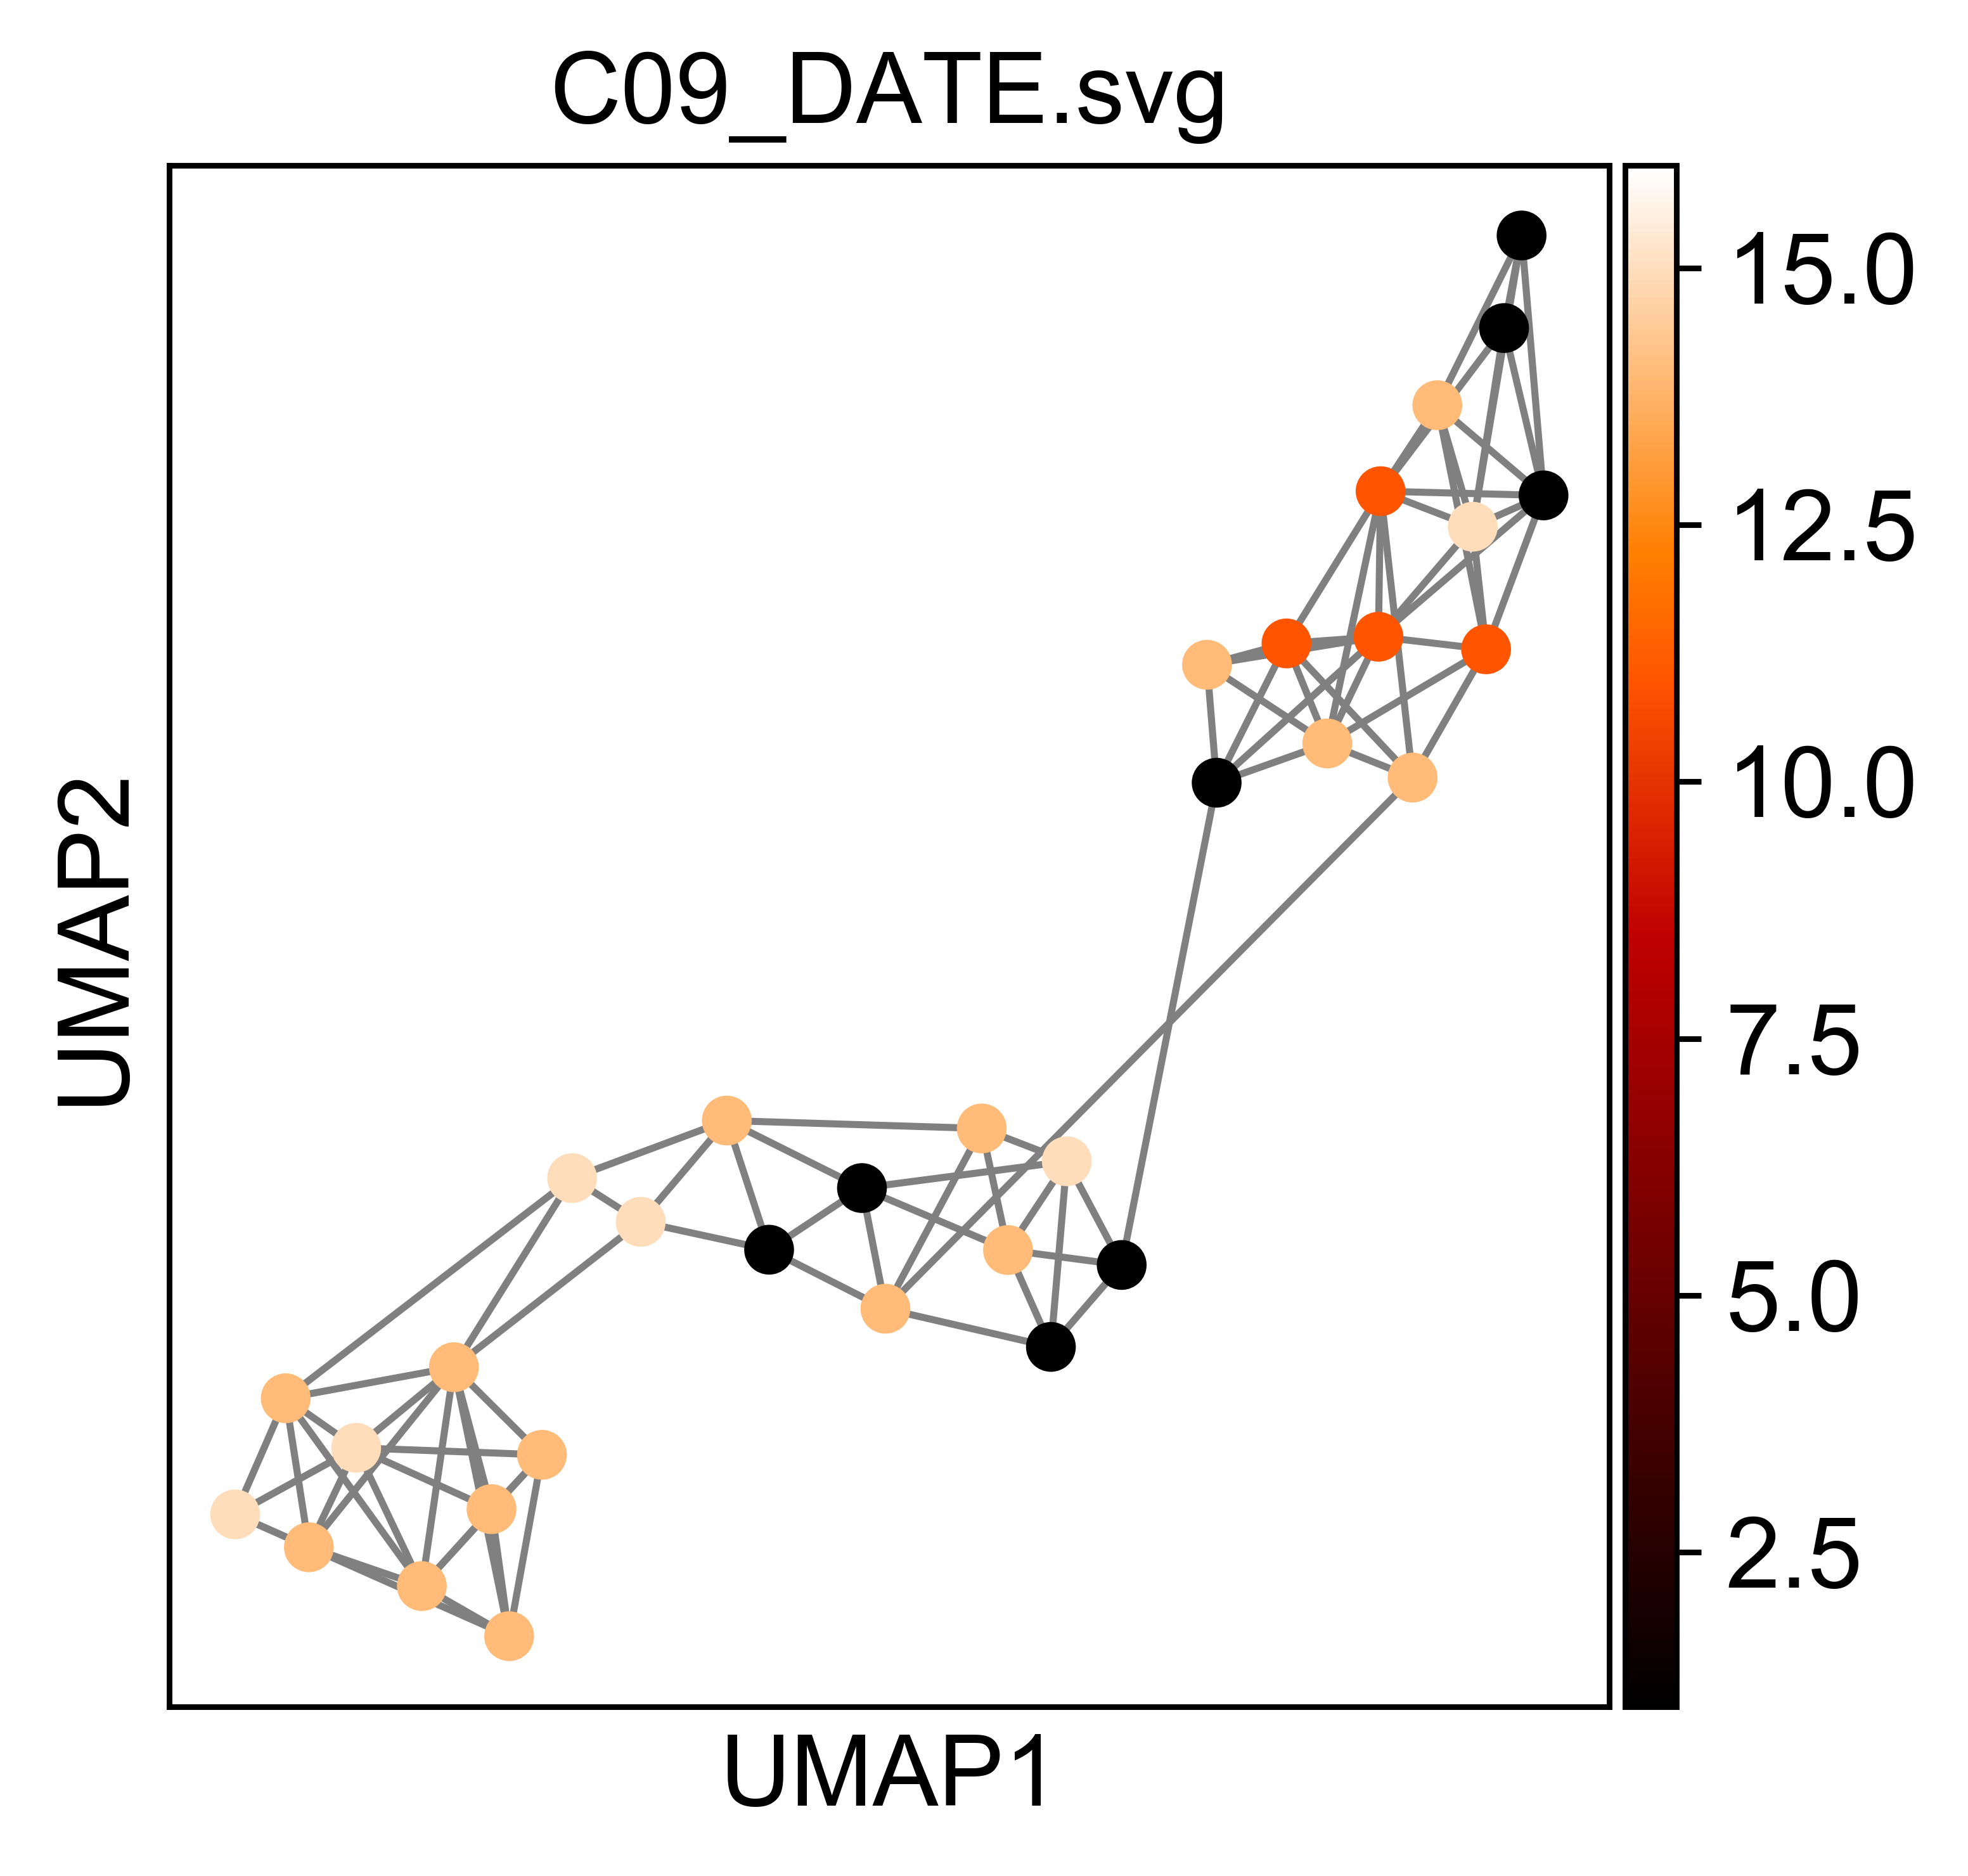

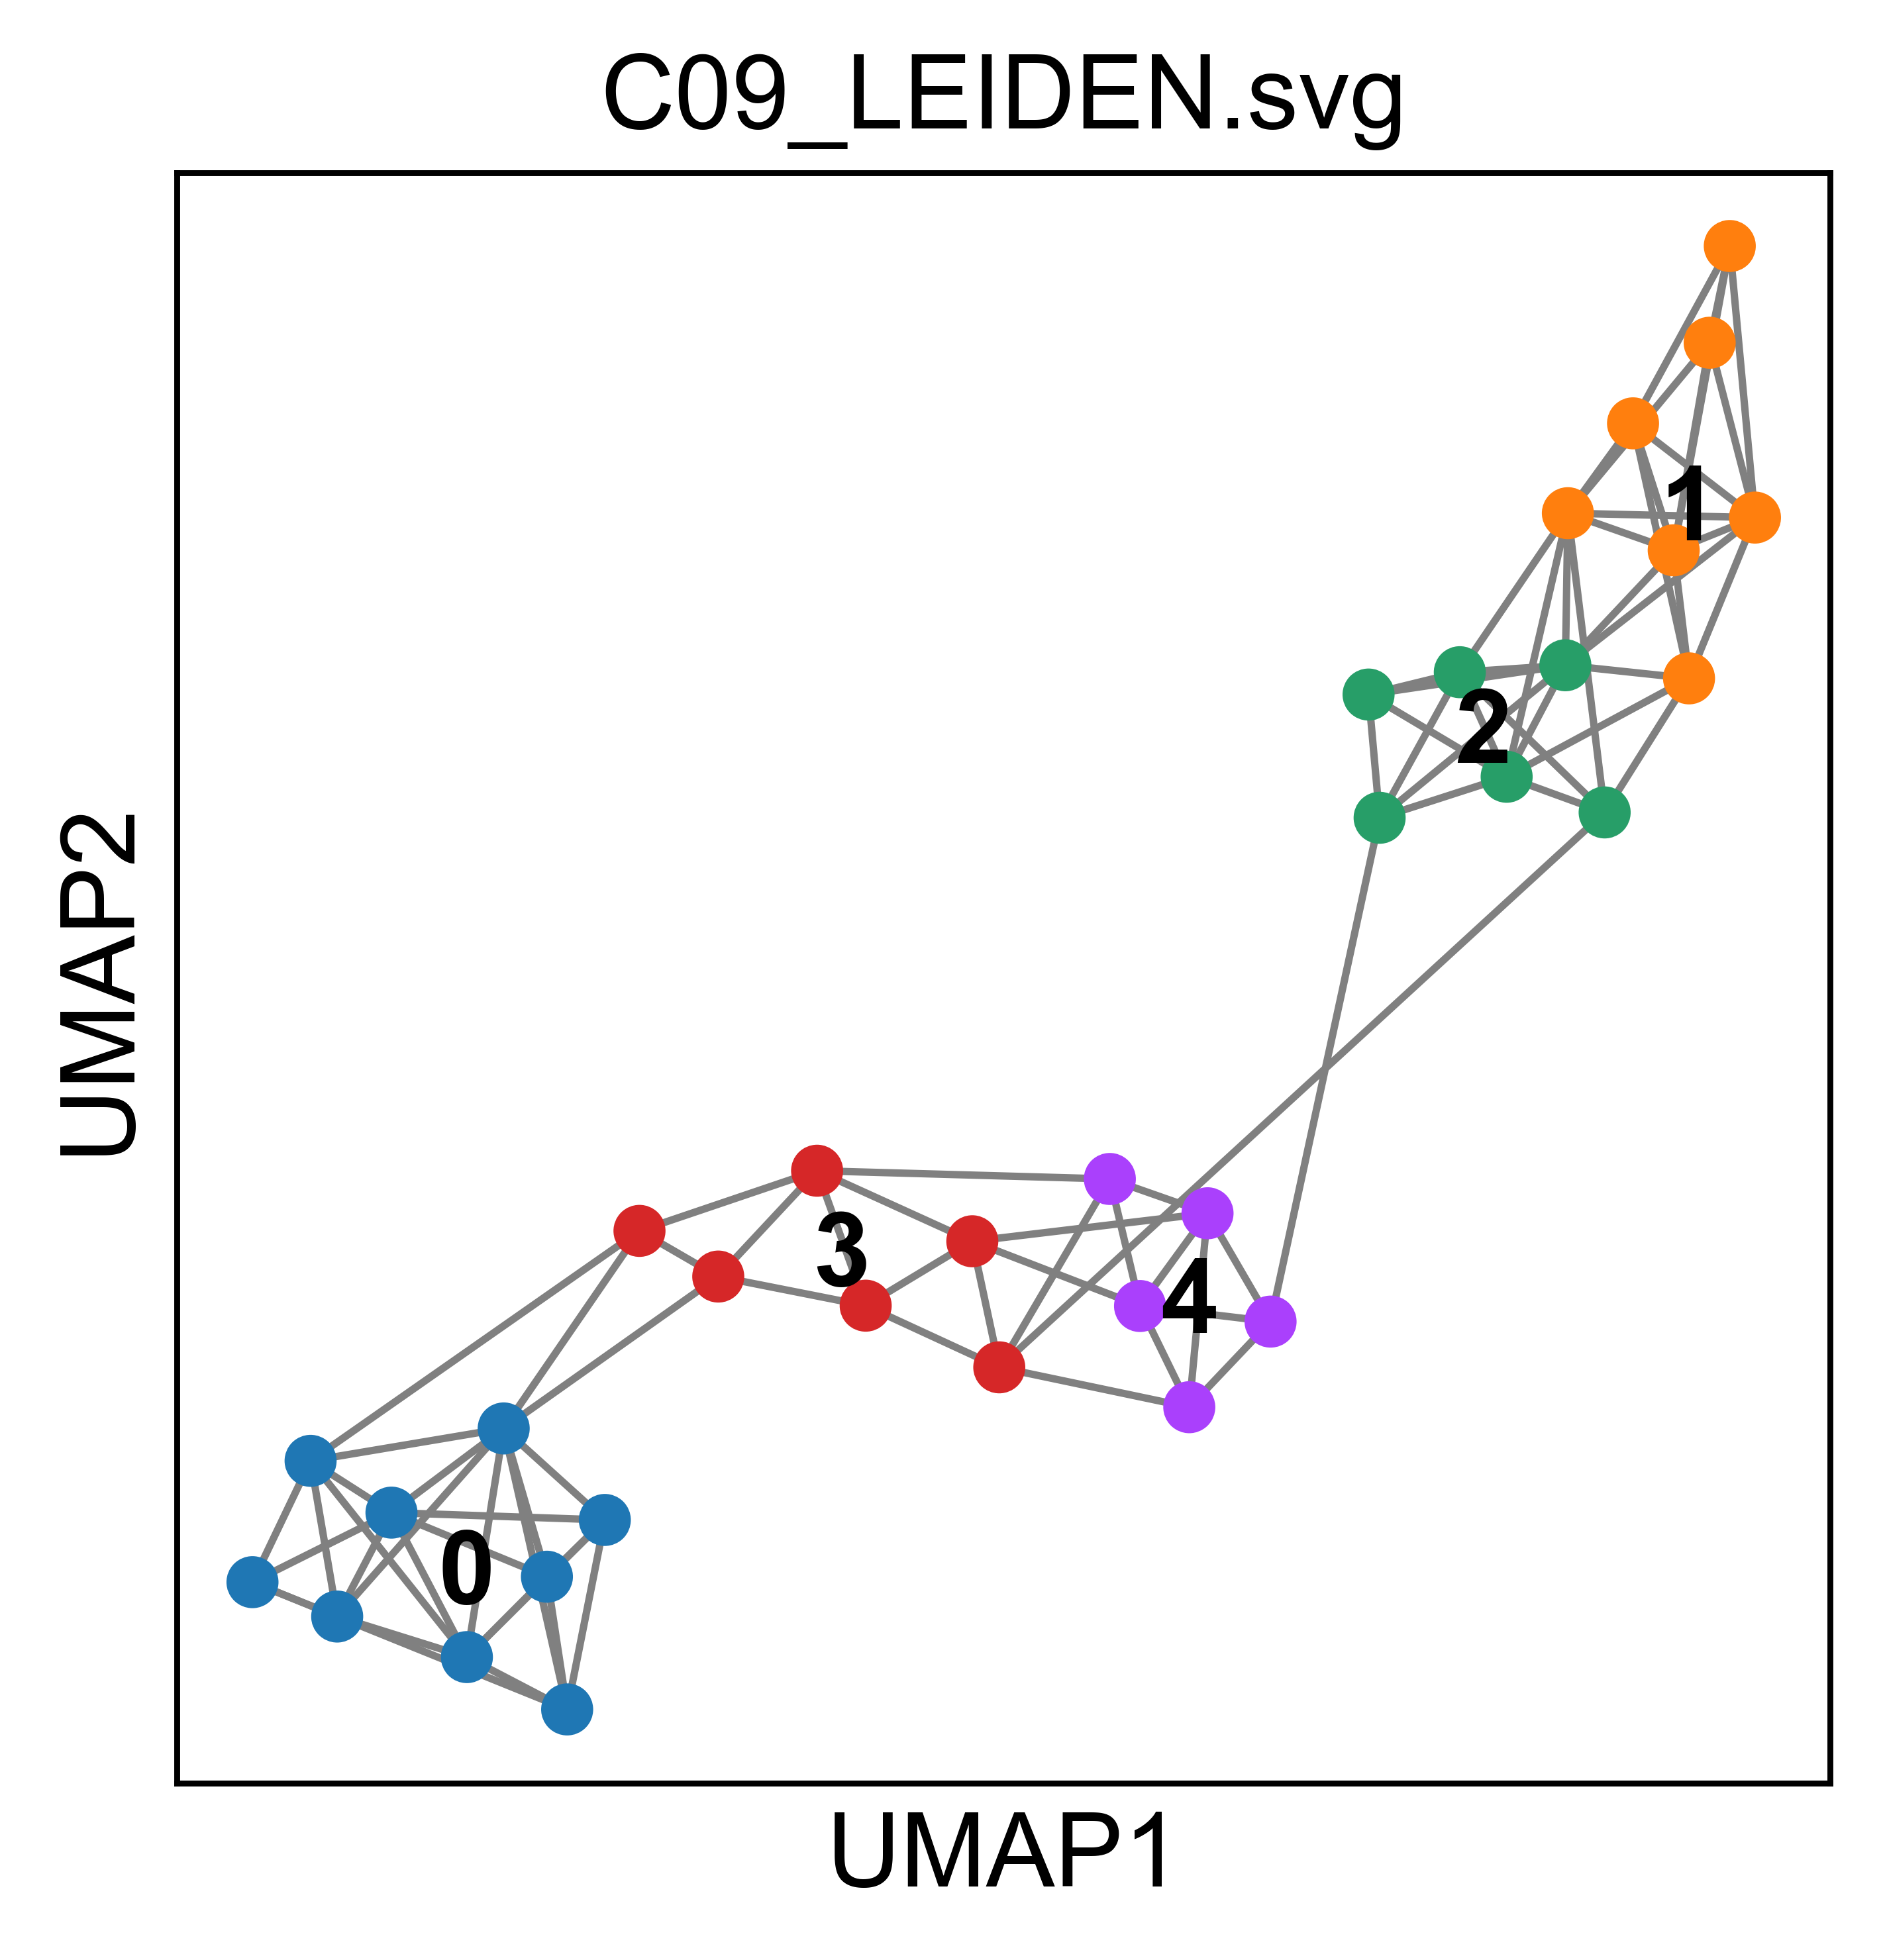

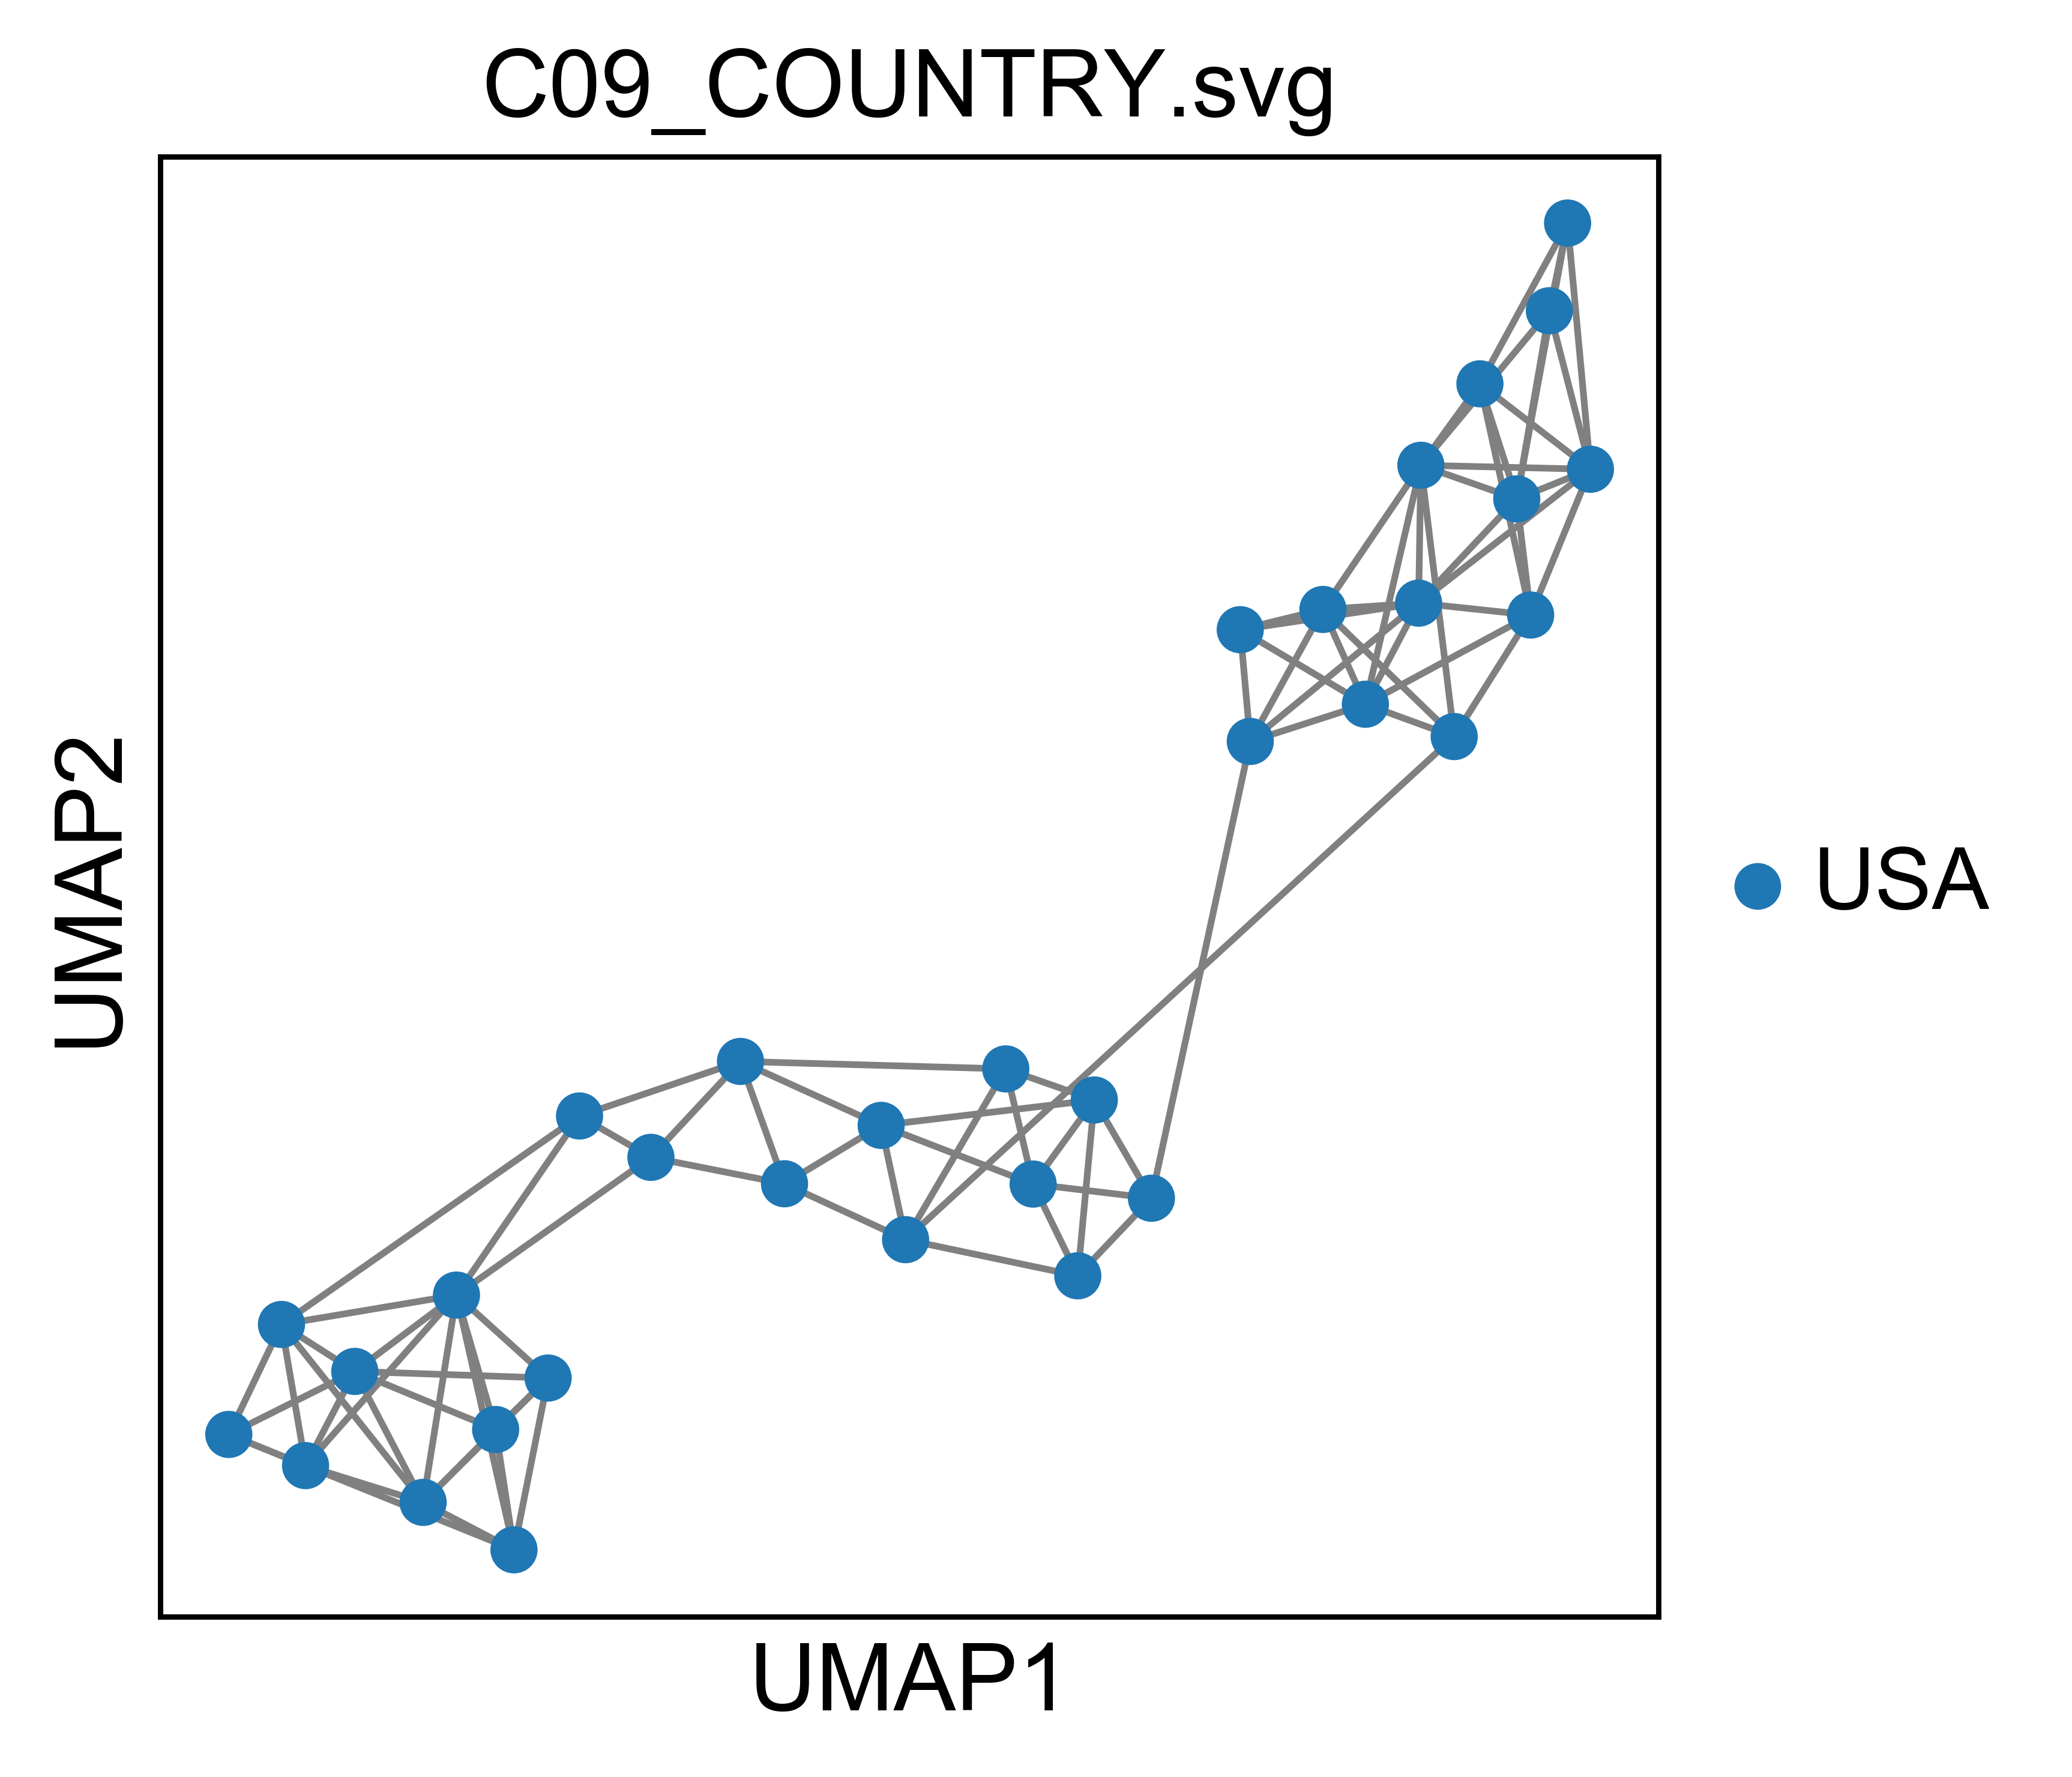

writing '.csv' files to C09


In [34]:
for x in range(4):
    temp = ('C' + str(0) + str(arr[x]))   
    
    adata_all_cluster = adata_all[adata_all.obs['Clade'] == temp].copy()
    how_many_samples = len(adata_all_cluster.obs)
    how_many_variables = len(adata_all_cluster.var)
 
    sc.pp.pca(adata_all_cluster, n_comps = how_many_samples, zero_center = 'False', random_state=1)
    sc.pp.neighbors(adata_all_cluster, knn = 'TRUE', n_neighbors = 5, random_state = 1, metric = 'braycurtis', method = "umap")
    sc.tl.leiden(adata_all_cluster, key_added = 'groups', random_state=1,resolution = 1)
    
    temp_name  = temp + '_DATE.svg'
    temp_name2 = temp + '_LEIDEN.svg'
    temp_name3 = temp + '_COUNTRY.svg'
    
    sc.tl.umap(adata_all_cluster, random_state = 1, spread = 2, min_dist = 1)

    sc.pl.umap(adata_all_cluster, color = ['DateGISAID'], color_map = 'gist_heat', edges = 'TRUE', edges_width = 1, size = 200, title = temp_name ,save = temp_name, vmin = 1, vmax = 16)
    sc.pl.umap(adata_all_cluster, color = ['groups'], legend_loc = 'on data', edges = 'TRUE', edges_width = 1, size = 200,  title = temp_name2 ,save = temp_name2)
    sc.pl.umap(adata_all_cluster, color = ['Country'], edges = 'TRUE', edges_width = 1, size = 200,  title = temp_name3 ,save = temp_name3)

    adata_all_cluster.write_csvs(temp+'.csv')
    